# Supermarket location analysis

<font size =" 7">

First of all we are going to updload the main data we are going to use to compute our models.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

market = pd.read_csv("market.csv")
market

,id,country,Unnamed: 2,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,NaN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,NaN,MINI,1402,252.0,522,YES
2,UX72,FRANCE,NaN,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,NaN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,NaN,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,NaN,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,NaN,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,NaN,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,NaN,MINI,2495,228.0,3848,YES


We can watch there is a column without any information (Unnamed:2), so we are going to delete it.

In [2]:
market = market.drop(["Unnamed: 2"], axis=1)
market

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,MINI,1402,252.0,522,YES
2,UX72,FRANCE,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...
745,ZM74,ITALY,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,MINI,2495,228.0,3848,YES


In [3]:
market.isnull().sum()

id                     0
country                0
market_type            2
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64

We are going to solve the problem of NaN. We have two diferent type of variables, one qualitative and one quantitative. 

In qualitative one predictor we are going to change the NaN by the most repeated quality. 

Quantitative ones are going to be changed by the mean of the predictor.

In [4]:
MeanAvg_Customers = market['avg_customers'].mean()
market['avg_customers'].fillna(MeanAvg_Customers, inplace=True)

Market_TypeCounts = market['market_type'].value_counts()
Market_TypeMaxCount = Market_TypeCounts.idxmax()
market['market_type'].fillna(Market_TypeMaxCount, inplace=True)

In [5]:
NaN=market.isnull().sum().sum()
print("The total amount of NaN in market dataset is:",NaN)

The total amount of NaN in market dataset is: 0


Now lets do the same with the other dataset.

In [6]:
sales = pd.read_csv("sales.csv")
sales

,market_id,date,is_open,sales_amount,
0,XC14,31/12/2022,YES,55727.34,NaN
1,WG25,31/12/2022,YES,12984.10,NaN
2,UX72,31/12/2022,YES,13046.56,NaN
3,EE84,31/12/2022,YES,60916.76,NaN
4,RF54,31/12/2022,YES,12376.42,NaN
...,...,...,...,...,...
523944,ZM74,01/01/2021,YES,21553.84,NaN
523945,WW60,01/01/2021,YES,56371.18,NaN
523946,LU14,01/01/2021,YES,24107.19,NaN
523947,HY57,01/01/2021,YES,12257.38,NaN


Same happens in sales, so we are going to do the same, but in this case there is a little change. 

We don´t know the name of the last column.

In [7]:
sales.columns

Index(['market_id', 'date', 'is_open', 'sales_amount', ' '], dtype='object')

In [8]:
sales = sales.drop([" "], axis=1)

We must transform "date" from an object to datetime64 (the year is given with 4 digits so we must take into account in the format)

In [9]:
sales["date"] = pd.to_datetime(sales["date"], format="%d/%m/%Y")
sales.dtypes

market_id               object
date            datetime64[ns]
is_open                 object
sales_amount           float64
dtype: object

We are going to check the NaN information again.

In [10]:
market.isnull().sum()

id                     0
country                0
market_type            0
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
dtype: int64

Perfect, now we are going to merge both datasets. 

First of all we are going to rename the column "id" because it is called diferent in each dataset and we are going to merge both through this one.

In [11]:
market = market.rename(columns={'id':'market_id'})


In [12]:
merged_df=pd.merge(sales,market,how='left',on="market_id")
merged_df

,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,2022-12-31,YES,55727.34,SPAIN,HYPER,11135.0,773.0,515.0,YES
1,WG25,2022-12-31,YES,12984.10,FRANCE,MINI,1402.0,252.0,522.0,YES
2,UX72,2022-12-31,YES,13046.56,FRANCE,MINI,1452.0,265.0,15939.0,YES
3,EE84,2022-12-31,YES,60916.76,SPAIN,HYPER,15259.0,874.0,754.0,YES
4,RF54,2022-12-31,YES,12376.42,FRANCE,MINI,2497.0,191.0,34007.0,YES
...,...,...,...,...,...,...,...,...,...,...
523944,ZM74,2021-01-01,YES,21553.84,ITALY,SUPER,5778.0,356.0,4424.0,YES
523945,WW60,2021-01-01,YES,56371.18,FRANCE,HYPER,10923.0,907.0,41359.0,YES
523946,LU14,2021-01-01,YES,24107.19,ITALY,SUPER,5742.0,397.0,2841.0,YES
523947,HY57,2021-01-01,YES,12257.38,ITALY,MINI,2495.0,228.0,3848.0,YES


In [13]:
merged_df.isnull().sum()

market_id               1
date                    1
is_open                 1
sales_amount           15
country                 1
market_type             1
square_feet             1
avg_customers           1
competitor_distance     1
has_promotions          1
dtype: int64

In [14]:
merged_df.loc[merged_df['market_id'].isnull()]

,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
477294,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are going to delte that entire row.

In [15]:
merged_df = merged_df.drop(merged_df.index[477294])
merged_df.isnull().sum()

market_id               0
date                    0
is_open                 0
sales_amount           14
country                 0
market_type             0
square_feet             0
avg_customers           0
competitor_distance     0
has_promotions          0
dtype: int64

In [16]:
MeanSales_Amount = merged_df['sales_amount'].mean()
merged_df['sales_amount'].fillna(MeanSales_Amount, inplace=True)
NaN_merged=merged_df.isnull().sum().sum()
print("The number of NaN data is:", NaN_merged)

The number of NaN data is: 0


Now lets check if there is any duplicated row.

In [17]:
merged_df.drop_duplicates()

,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,2022-12-31,YES,55727.34,SPAIN,HYPER,11135.0,773.0,515.0,YES
1,WG25,2022-12-31,YES,12984.10,FRANCE,MINI,1402.0,252.0,522.0,YES
2,UX72,2022-12-31,YES,13046.56,FRANCE,MINI,1452.0,265.0,15939.0,YES
3,EE84,2022-12-31,YES,60916.76,SPAIN,HYPER,15259.0,874.0,754.0,YES
4,RF54,2022-12-31,YES,12376.42,FRANCE,MINI,2497.0,191.0,34007.0,YES
...,...,...,...,...,...,...,...,...,...,...
523944,ZM74,2021-01-01,YES,21553.84,ITALY,SUPER,5778.0,356.0,4424.0,YES
523945,WW60,2021-01-01,YES,56371.18,FRANCE,HYPER,10923.0,907.0,41359.0,YES
523946,LU14,2021-01-01,YES,24107.19,ITALY,SUPER,5742.0,397.0,2841.0,YES
523947,HY57,2021-01-01,YES,12257.38,ITALY,MINI,2495.0,228.0,3848.0,YES


To continue with, let´s representate graphicaly the predictors so we can get some conclusion about how are their impact in the response.

Also we can check the outliers.

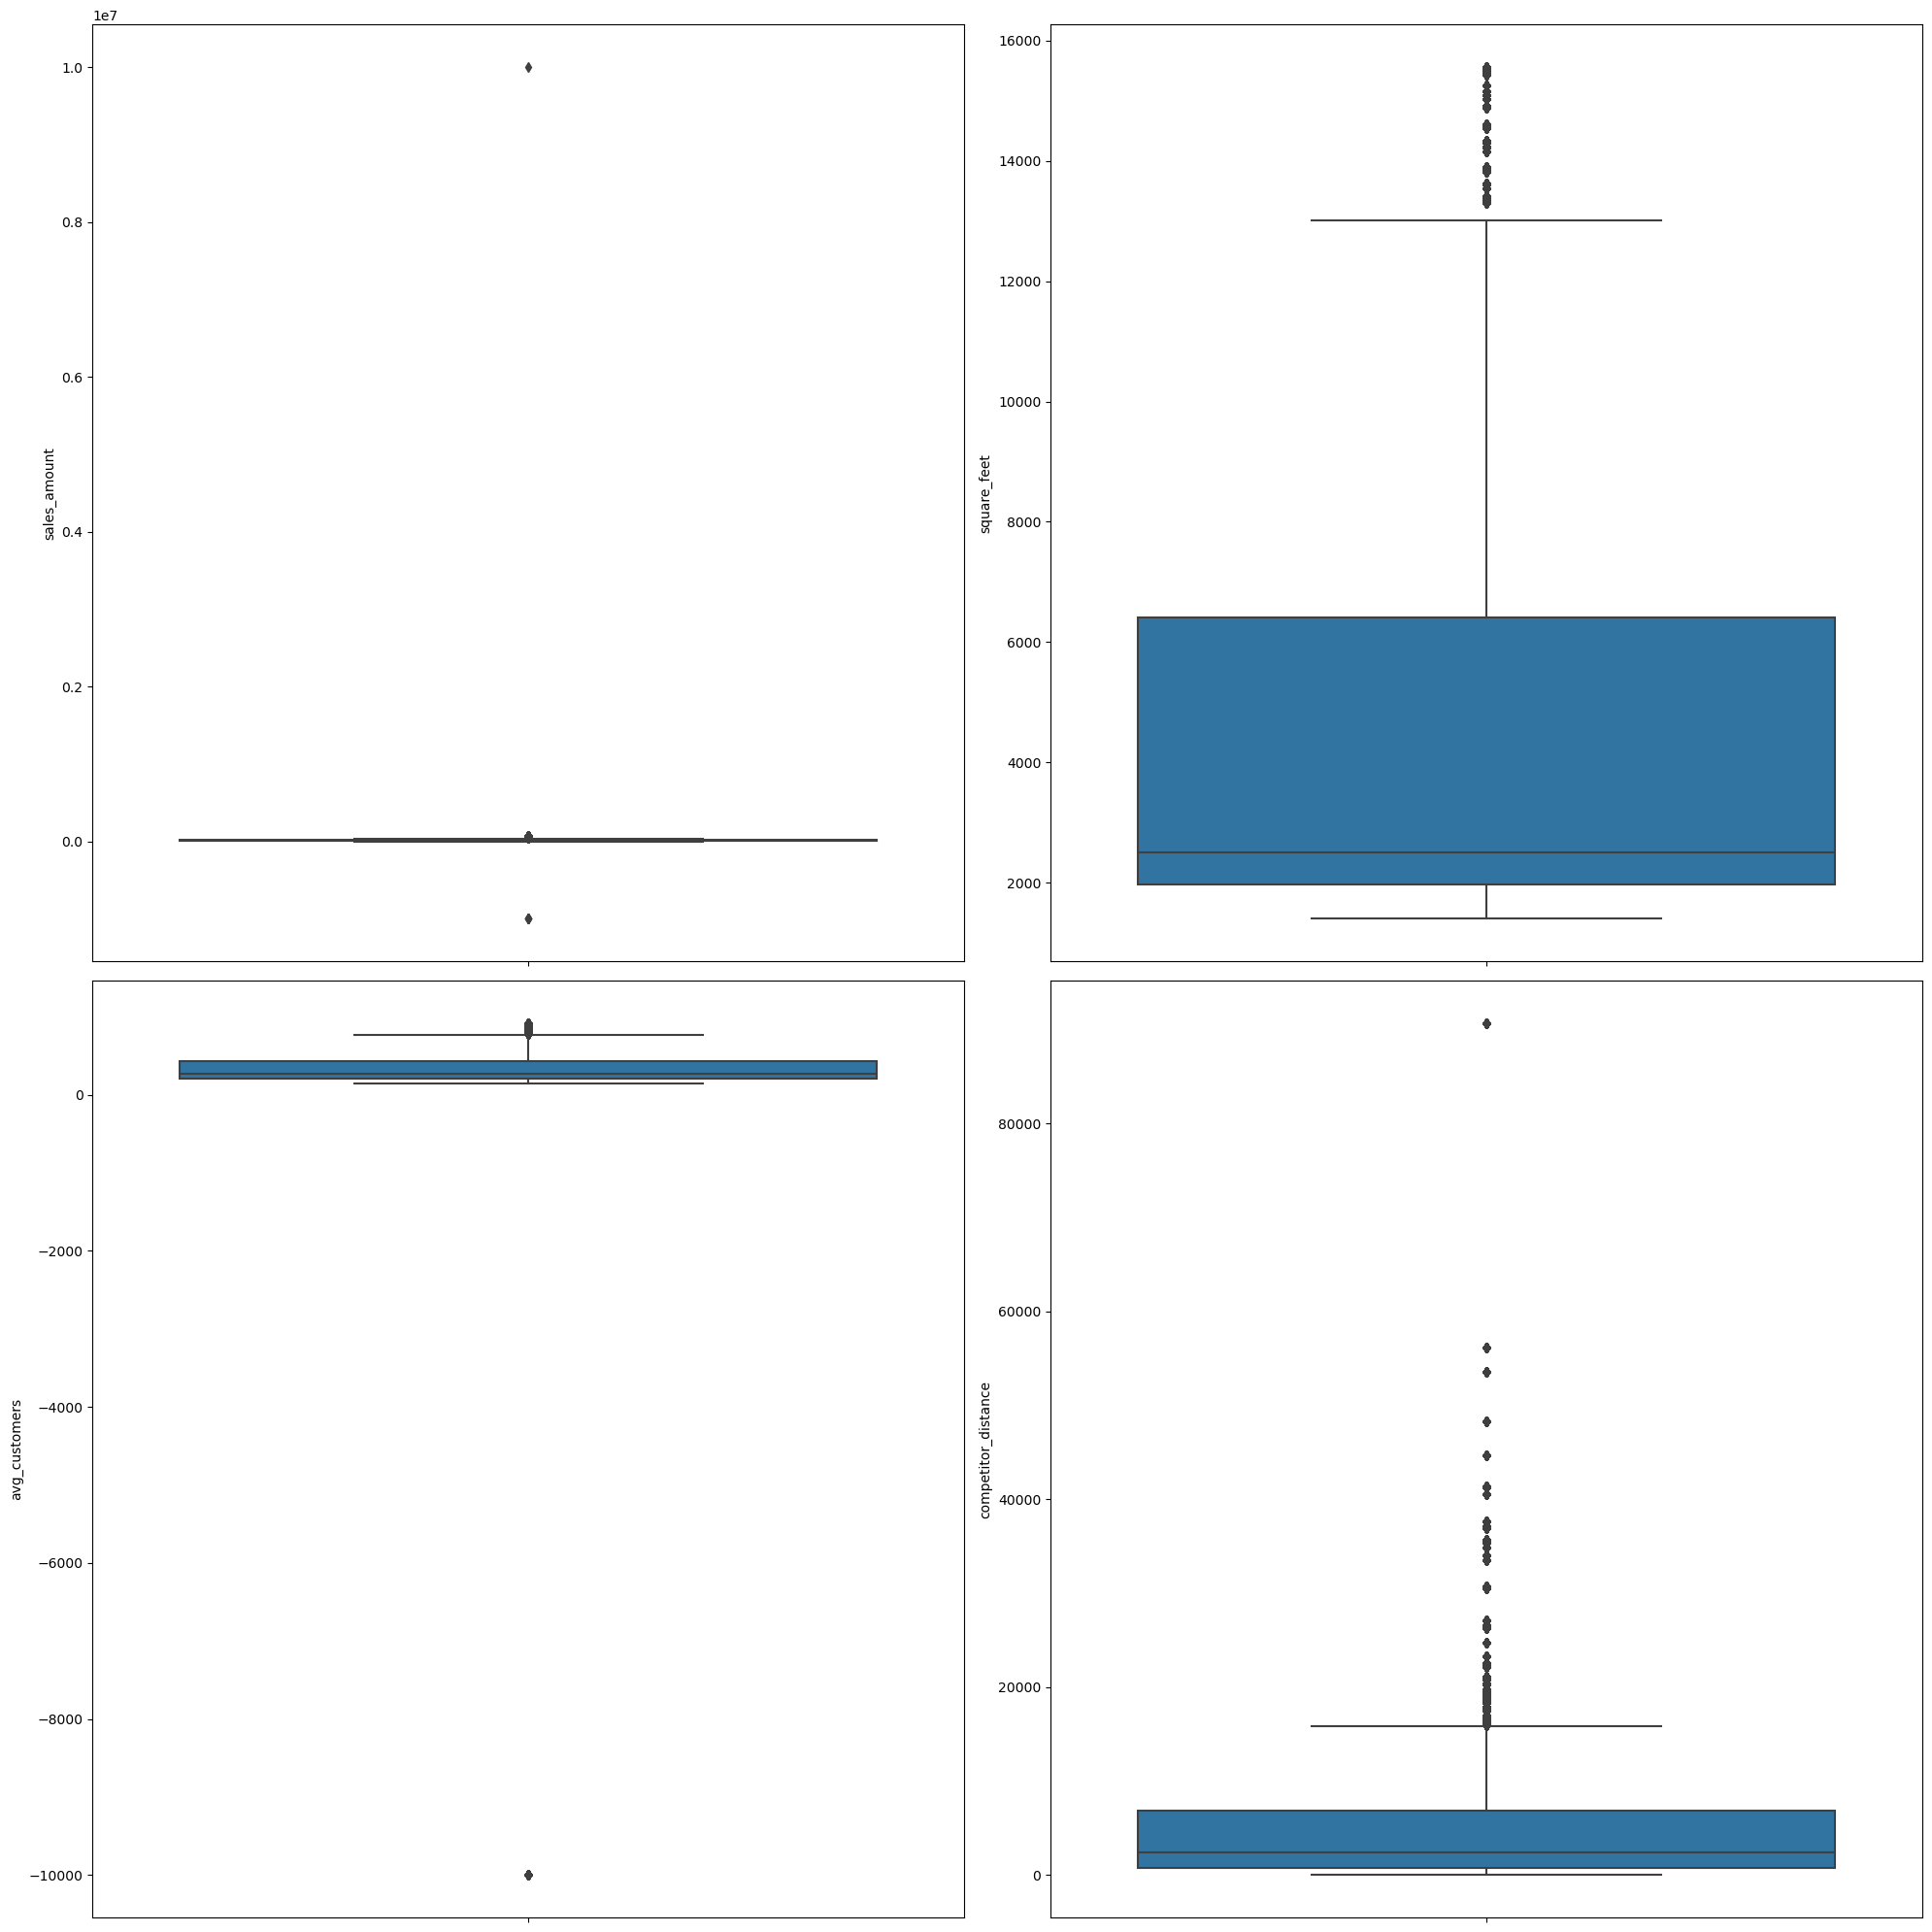

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

InterestingColumns = ["sales_amount", "square_feet", "avg_customers", "competitor_distance"]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
index = 0
ax = ax.flatten()
for col in InterestingColumns:
    sns.boxplot(y=col, data=merged_df, ax=ax[index])
    index +=1
plt.tight_layout()

We can clearly assume there are some observations wrong in our dataset (average customers can´t be negative, and sales amount in one day can´t be neither negative nor 10M euros) 

Lets delete the observation with negative sales amount and swap the negative average customers by the mean.

In [19]:
merged_df=merged_df.drop(merged_df.loc[merged_df['sales_amount']< 0].index)
merged_df=merged_df.drop(merged_df.loc[merged_df['sales_amount']>0.8*10000000].index)

import numpy as np

condicion = merged_df['avg_customers']<0
merged_df.loc[condicion, 'avg_customers']=np.nan


MeanAvg_Customers = merged_df['avg_customers'].mean()
merged_df['avg_customers'].fillna(MeanAvg_Customers, inplace=True)

merged_df

,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,2022-12-31,YES,55727.34,SPAIN,HYPER,11135.0,773.0,515.0,YES
1,WG25,2022-12-31,YES,12984.10,FRANCE,MINI,1402.0,252.0,522.0,YES
2,UX72,2022-12-31,YES,13046.56,FRANCE,MINI,1452.0,265.0,15939.0,YES
3,EE84,2022-12-31,YES,60916.76,SPAIN,HYPER,15259.0,874.0,754.0,YES
4,RF54,2022-12-31,YES,12376.42,FRANCE,MINI,2497.0,191.0,34007.0,YES
...,...,...,...,...,...,...,...,...,...,...
523944,ZM74,2021-01-01,YES,21553.84,ITALY,SUPER,5778.0,356.0,4424.0,YES
523945,WW60,2021-01-01,YES,56371.18,FRANCE,HYPER,10923.0,907.0,41359.0,YES
523946,LU14,2021-01-01,YES,24107.19,ITALY,SUPER,5742.0,397.0,2841.0,YES
523947,HY57,2021-01-01,YES,12257.38,ITALY,MINI,2495.0,228.0,3848.0,YES


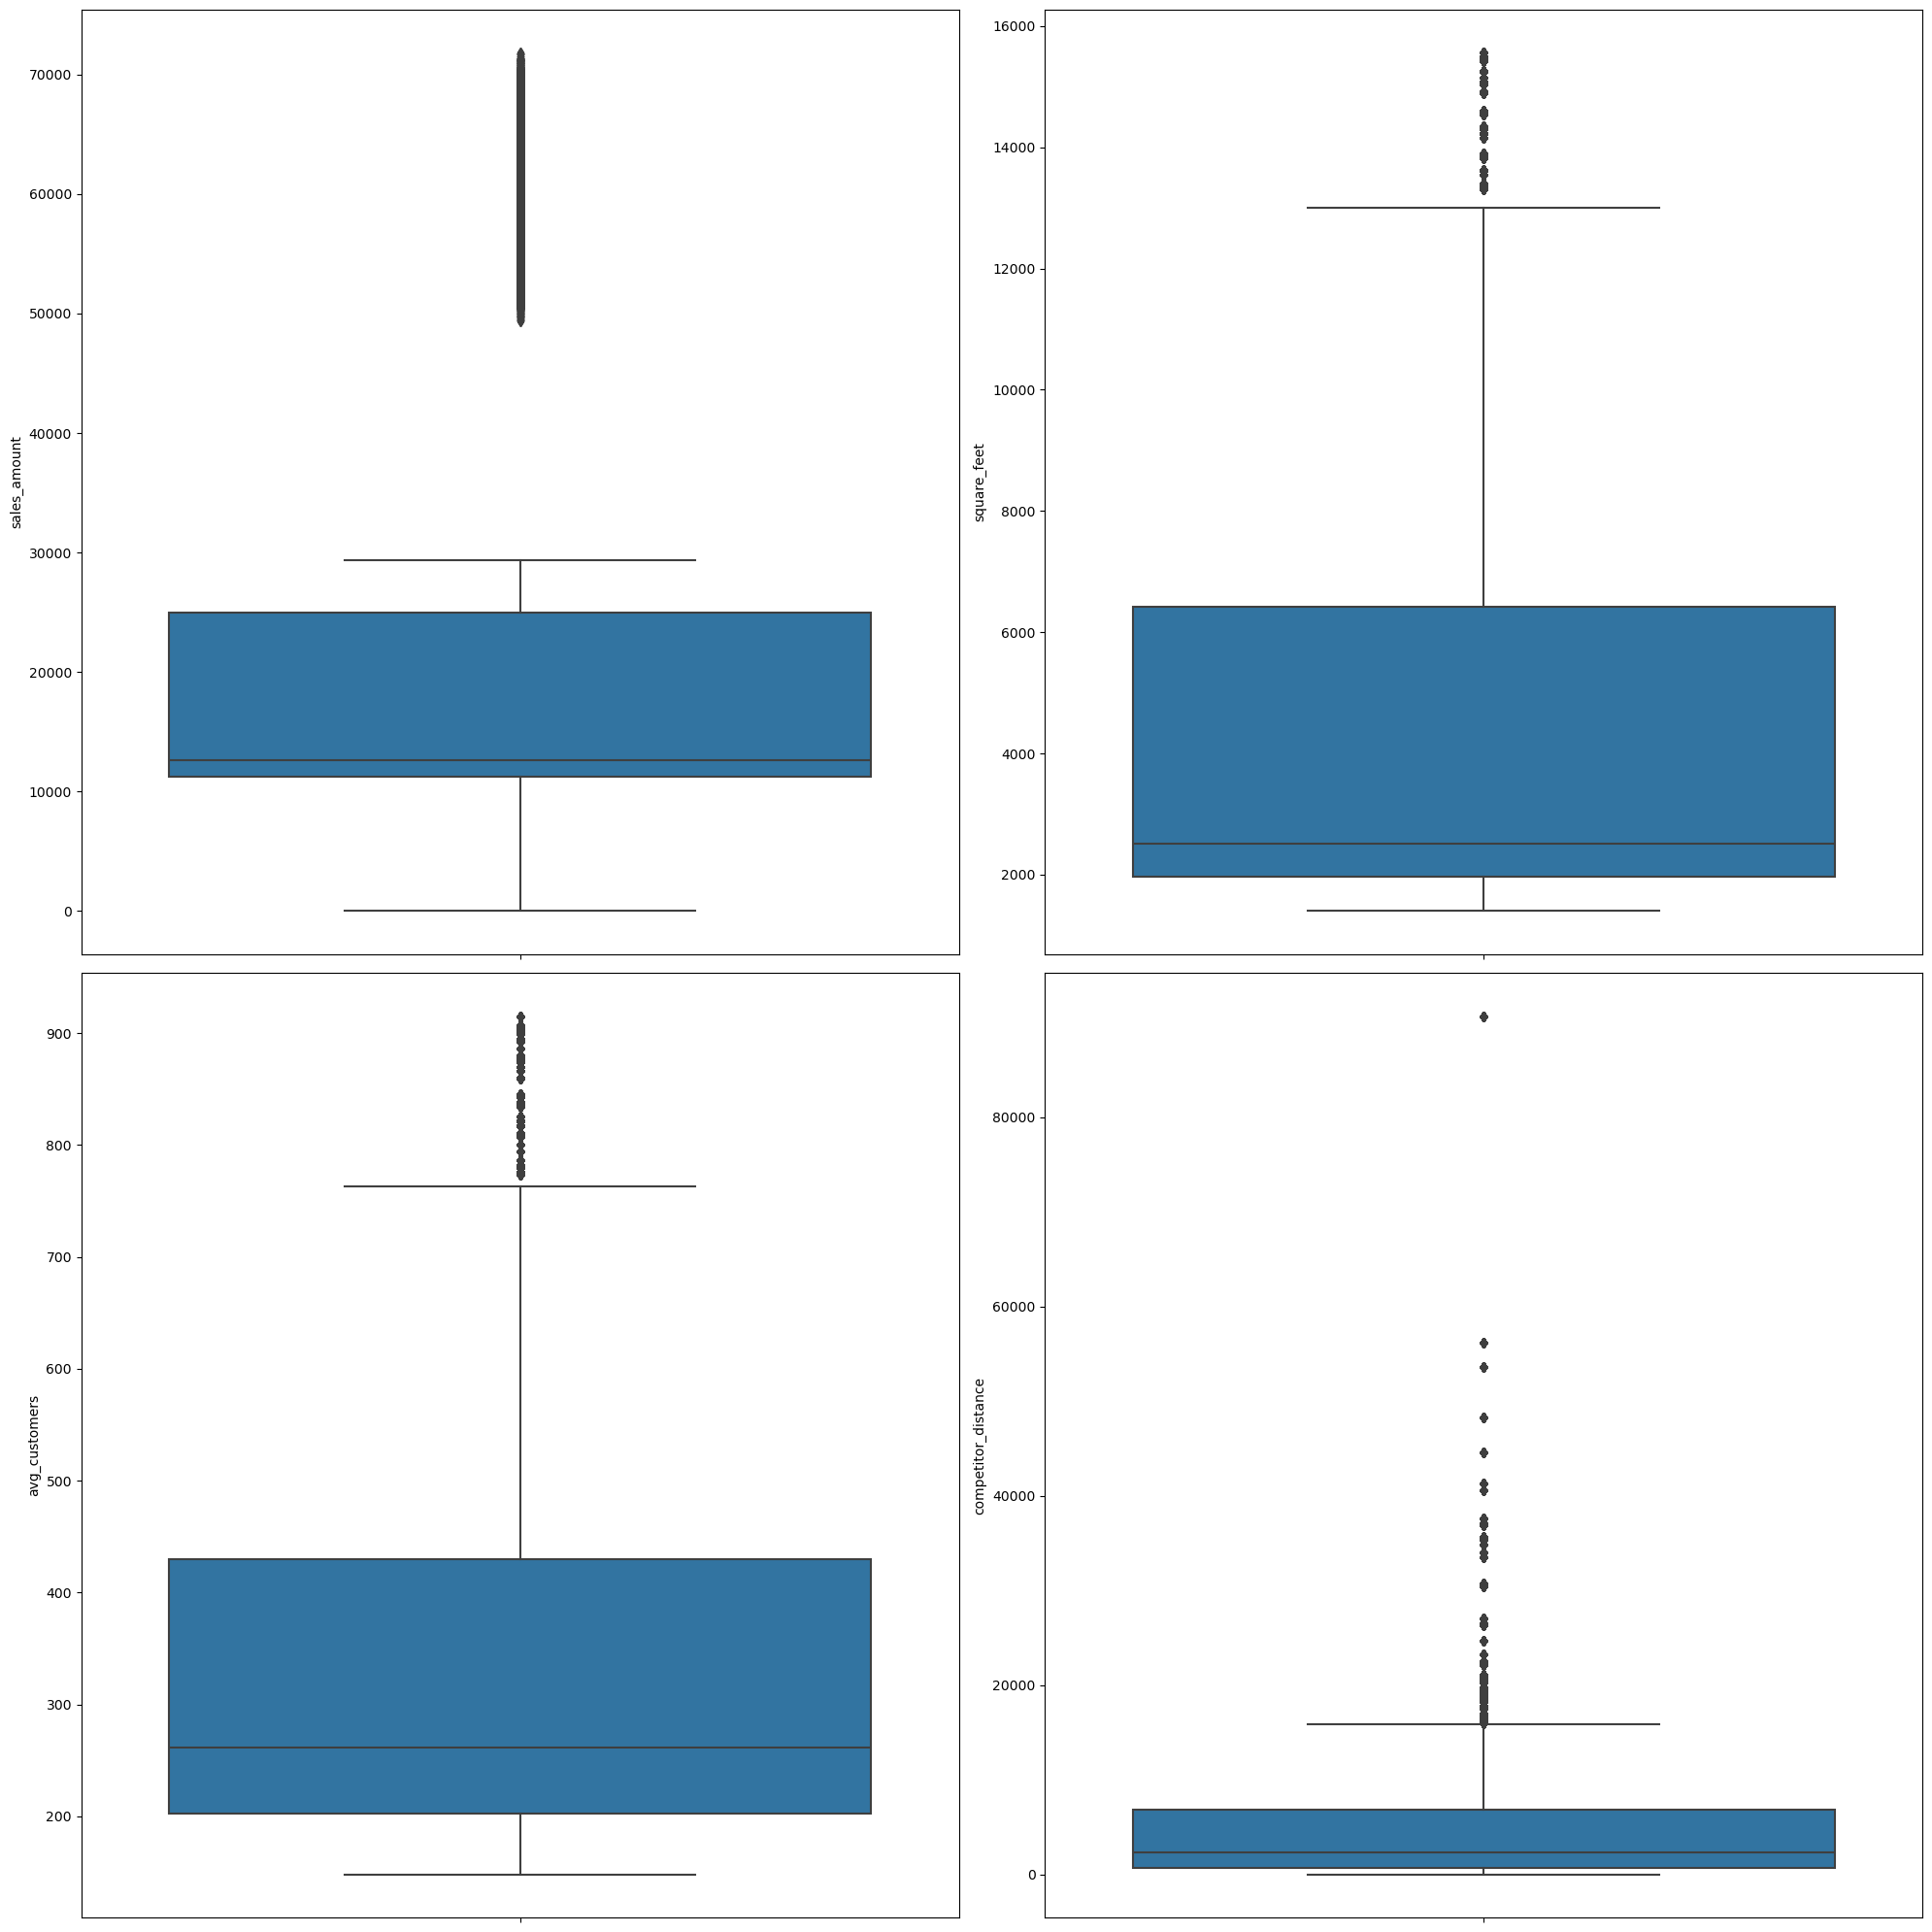

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
index = 0
ax = ax.flatten()
for col in InterestingColumns:
    sns.boxplot(y=col, data=merged_df, ax=ax[index])
    index +=1
plt.tight_layout()

But we have committed a mistake, at the begining of the project I have swapped a NaN observation of "avg_customers" by the mean. 

That mean is wrong because it has been calculated with this negative value. SWe have to solve this problem.

The gist here is to swap the negative value by an NaN first, and then change that by the mean calculated without the negative value.

In [21]:
true_market = pd.read_csv("market.csv")
true_market = true_market.drop(["Unnamed: 2"], axis=1)

TrueMarket_TypeCounts = true_market['market_type'].value_counts()
TrueMarket_TypeMaxCount = TrueMarket_TypeCounts.idxmax()
true_market['market_type'].fillna(TrueMarket_TypeMaxCount, inplace=True)

true_condicion = true_market['avg_customers']<0
true_market.loc[condicion, 'avg_customers']=np.nan

TrueMeanAvg_Customers = true_market['avg_customers'].mean()
true_market['avg_customers'].fillna(TrueMeanAvg_Customers, inplace=True)

true_market = true_market.rename(columns={'id':'market_id'})

true_merged_df=pd.merge(sales,true_market,how='left',on="market_id")
true_merged_df


,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,2022-12-31,YES,55727.34,SPAIN,HYPER,11135.0,773.0,515.0,YES
1,WG25,2022-12-31,YES,12984.10,FRANCE,MINI,1402.0,252.0,522.0,YES
2,UX72,2022-12-31,YES,13046.56,FRANCE,MINI,1452.0,265.0,15939.0,YES
3,EE84,2022-12-31,YES,60916.76,SPAIN,HYPER,15259.0,874.0,754.0,YES
4,RF54,2022-12-31,YES,12376.42,FRANCE,MINI,2497.0,191.0,34007.0,YES
...,...,...,...,...,...,...,...,...,...,...
523944,ZM74,2021-01-01,YES,21553.84,ITALY,SUPER,5778.0,356.0,4424.0,YES
523945,WW60,2021-01-01,YES,56371.18,FRANCE,HYPER,10923.0,907.0,41359.0,YES
523946,LU14,2021-01-01,YES,24107.19,ITALY,SUPER,5742.0,397.0,2841.0,YES
523947,HY57,2021-01-01,YES,12257.38,ITALY,MINI,2495.0,228.0,3848.0,YES


We again need to delete the outliers we are evaluating as wrong observations because they can have a huge impact on our bias-variance trade off.

In [22]:
true_merged_df=true_merged_df.drop(true_merged_df.loc[true_merged_df['sales_amount']< 0].index)
true_merged_df=true_merged_df.drop(true_merged_df.loc[true_merged_df['sales_amount']>0.8*10000000].index)

true_merged_df.isnull().sum()


market_id               1
date                    1
is_open                 1
sales_amount           15
country                 1
market_type             1
square_feet             1
avg_customers           1
competitor_distance     1
has_promotions          1
dtype: int64

In [23]:
true_merged_df.loc[true_merged_df['market_id'].isna()]

,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
477294,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
true_merged_df.drop(477294, inplace=True)

TrueMeanSales_Amount = true_merged_df['sales_amount'].mean()
true_merged_df['sales_amount'].fillna(TrueMeanSales_Amount, inplace=True)

In [25]:
true_merged_df.isnull().sum()


market_id              0
date                   0
is_open                0
sales_amount           0
country                0
market_type            0
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
dtype: int64

We can visualize some relevante information about or quantitative predictors representing them in boxplots.

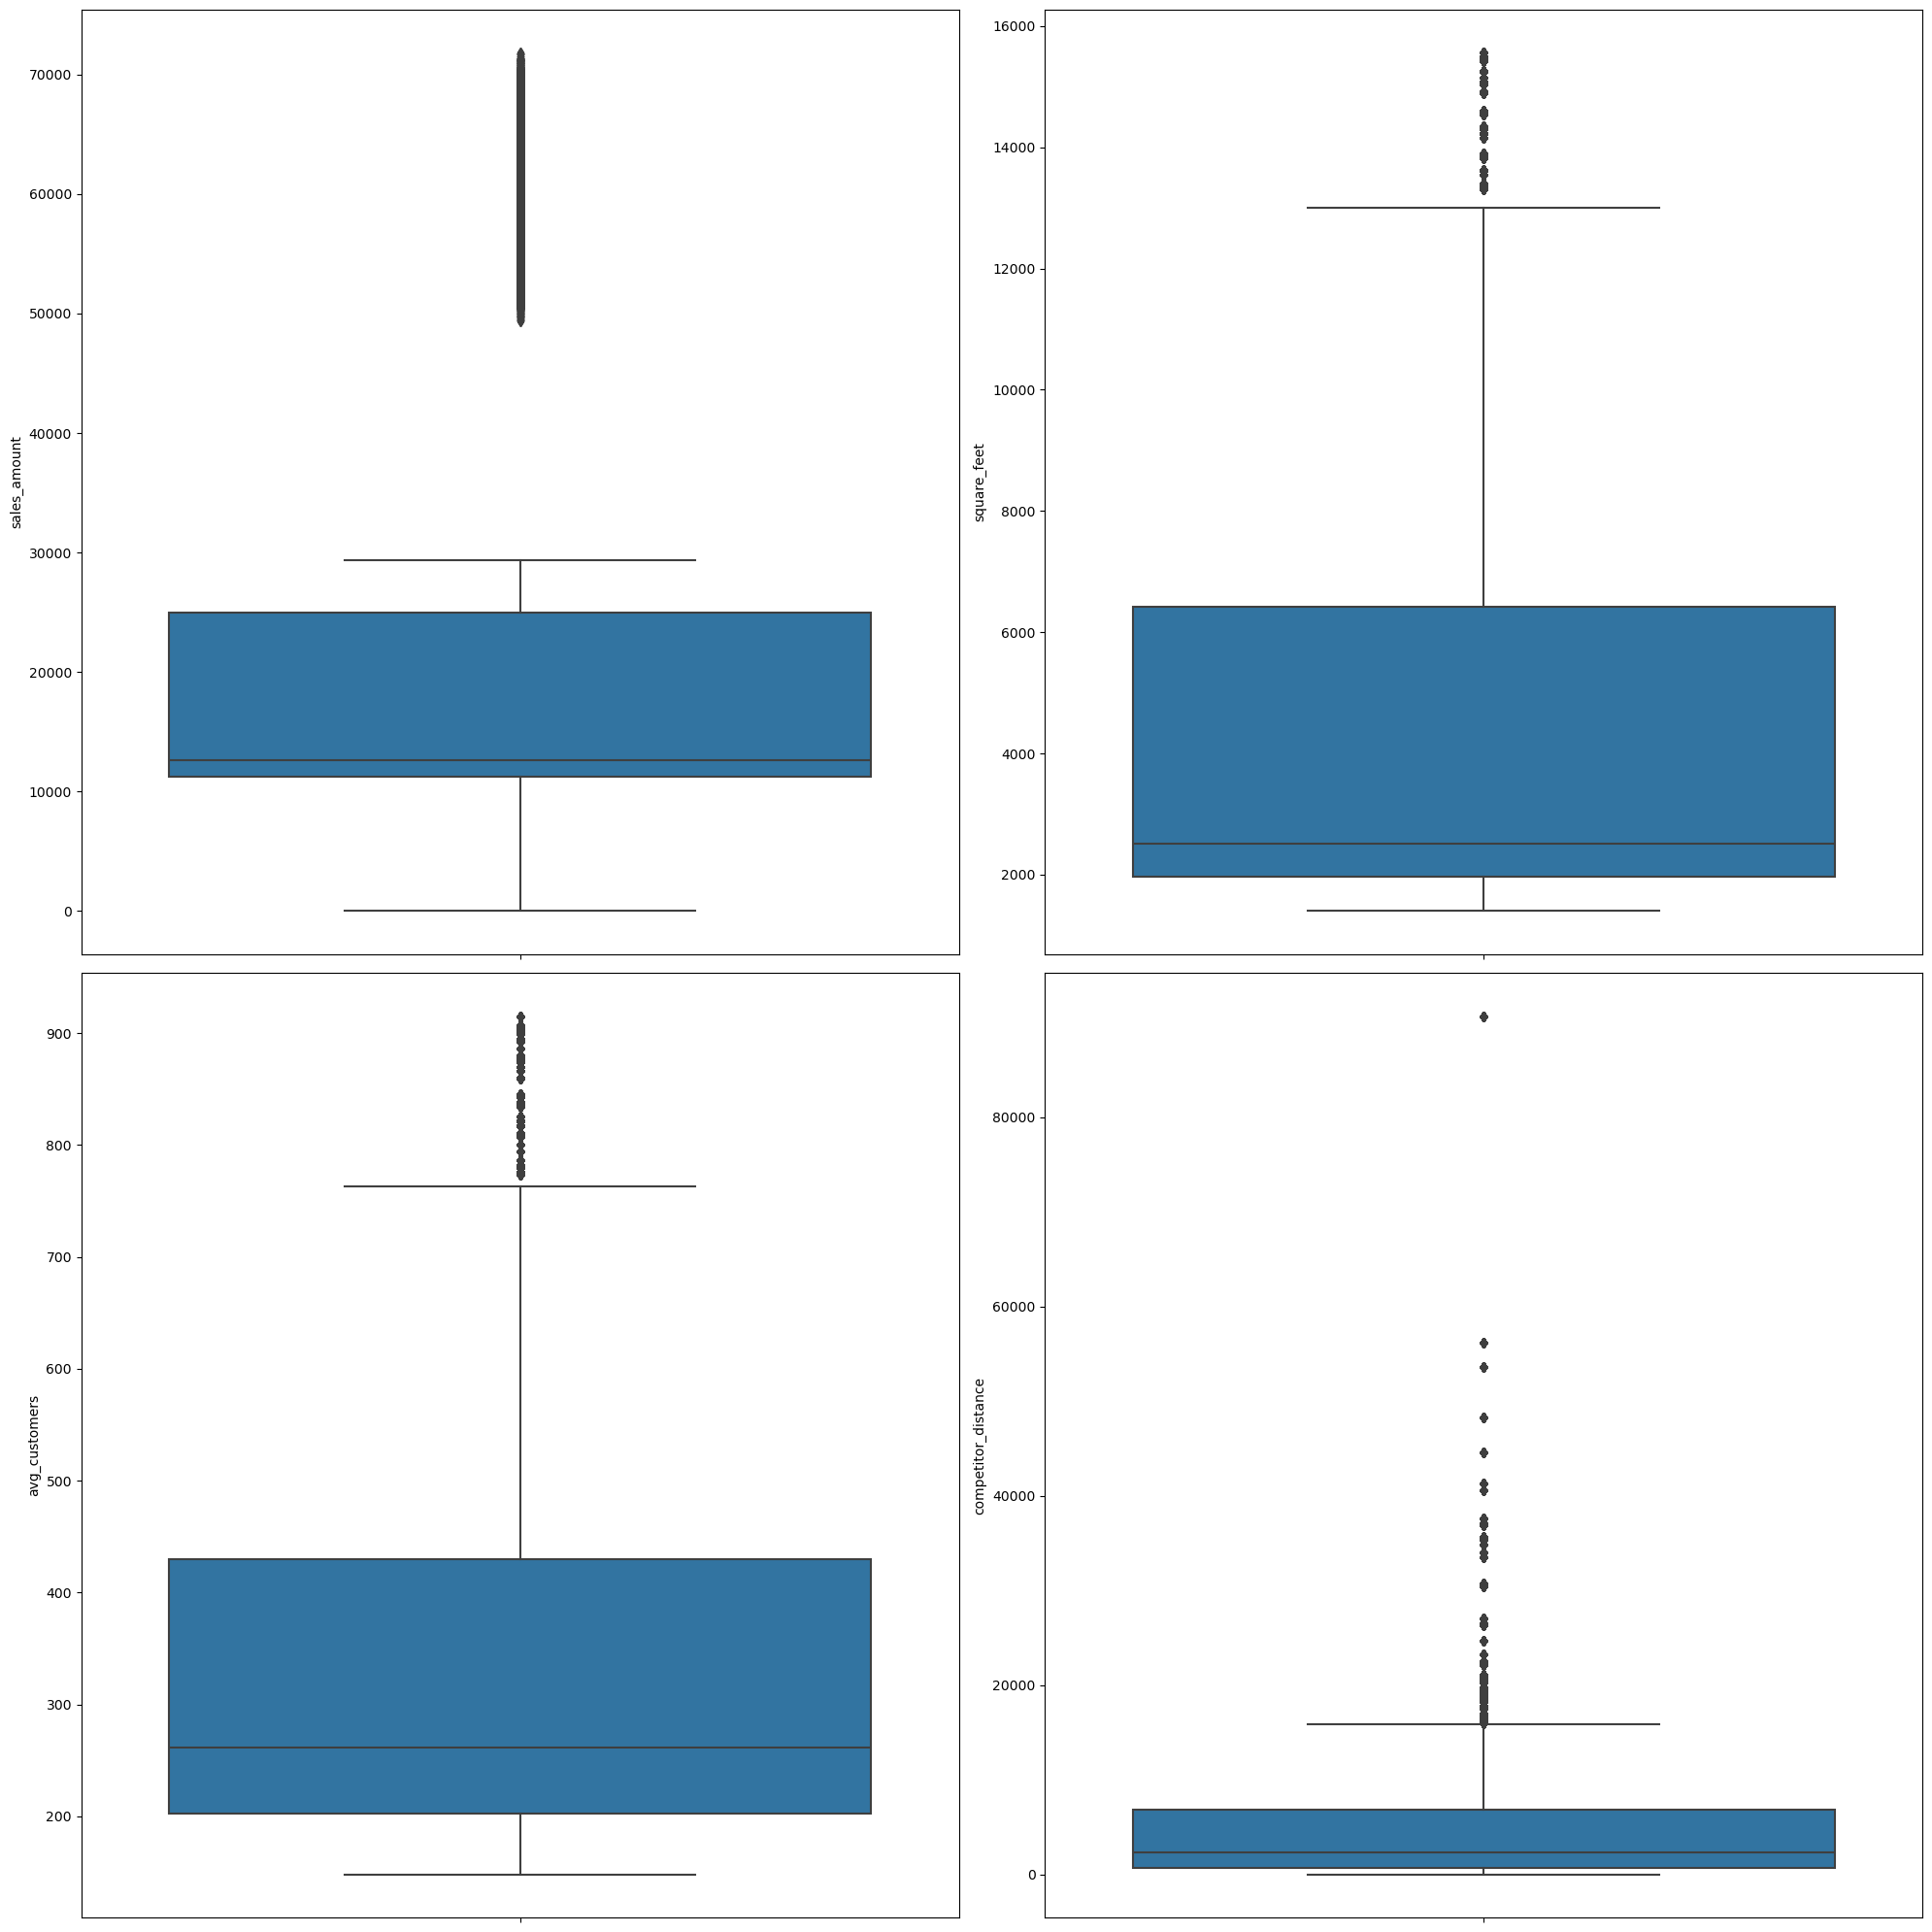

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
index = 0
ax = ax.flatten()
for col in InterestingColumns:
    sns.boxplot(y=col, data=true_merged_df, ax=ax[index])
    index +=1
plt.tight_layout()

Lets compute the IQR and check the values that are below/above the next equations:

1) Quantile(0.25) - 1.5 * IQR 

2) Quantile(0.75) + 1.5 * IQR 
 

In [27]:
InterestingColumns_df=true_merged_df[InterestingColumns]

for k, v in InterestingColumns_df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}% of outliers")


The column sales_amount has 10.28% of outliers
The column square_feet has 4.28% of outliers
The column avg_customers has 5.54% of outliers
The column competitor_distance has 8.84% of outliers


We have a first look at our quantitative predictors.

We are going to face them against our response variable to get some interesting information.

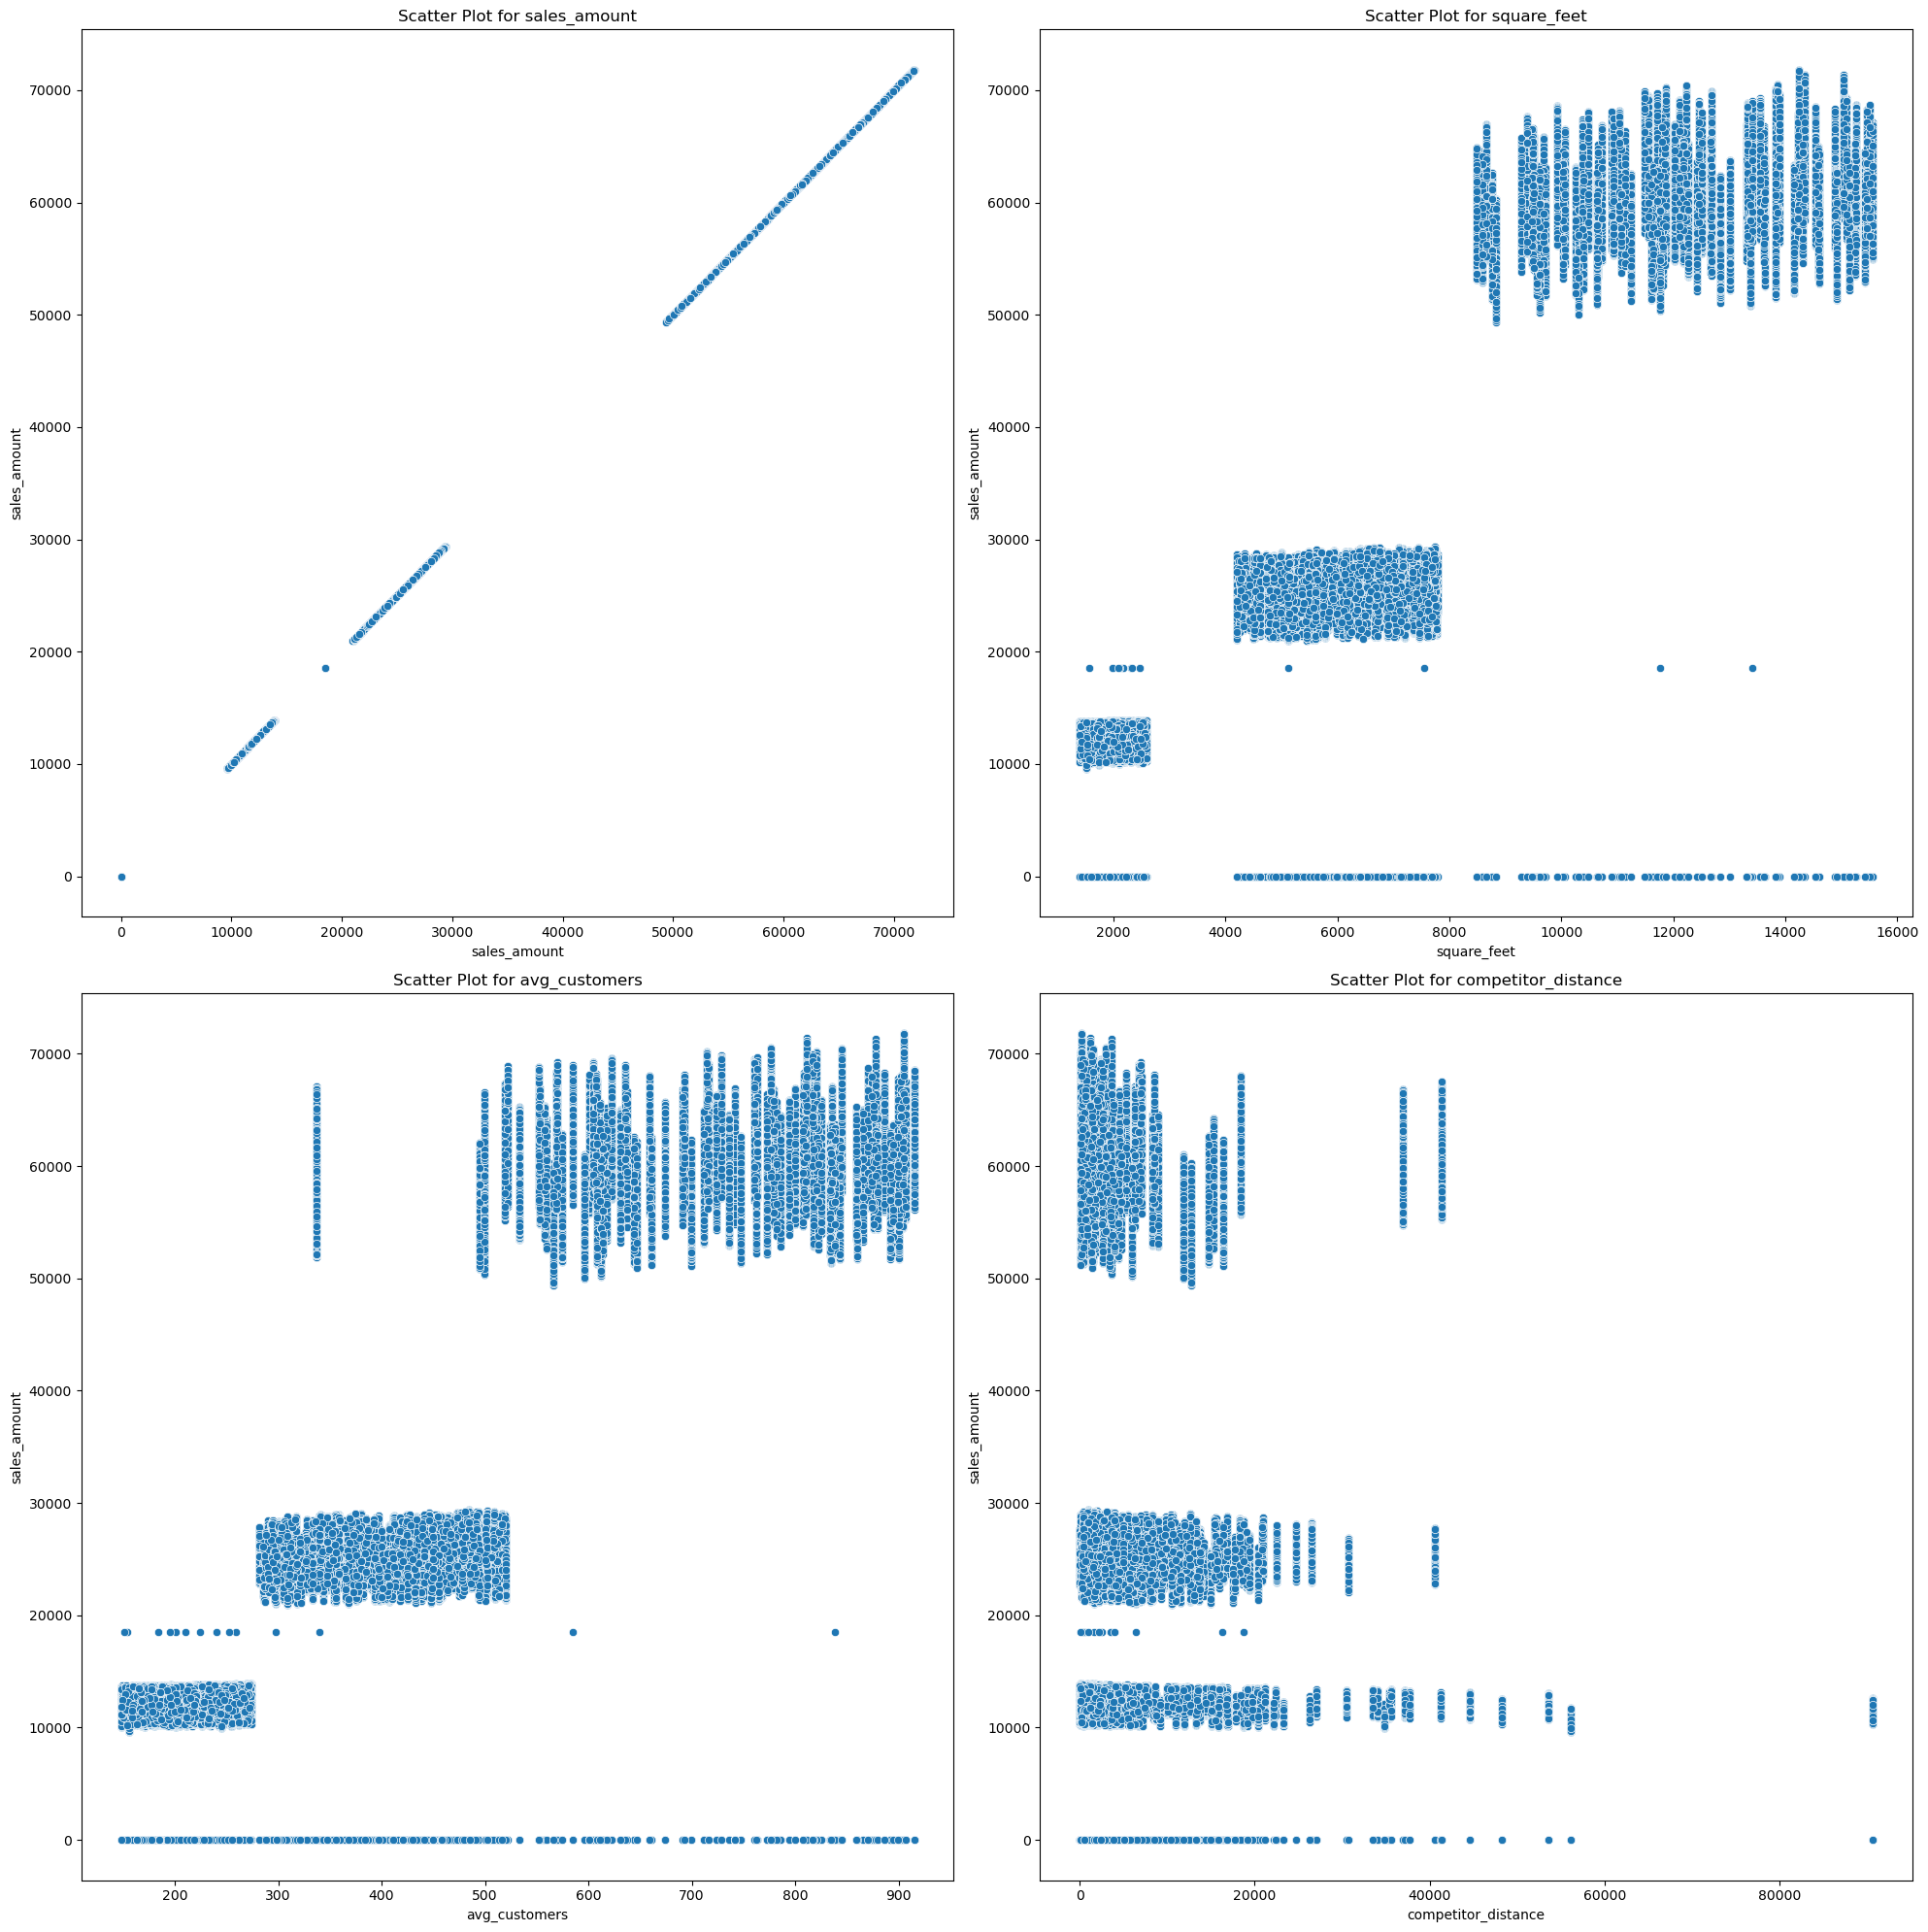

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(InterestingColumns):
    sns.scatterplot(data=InterestingColumns_df, x=col, y='sales_amount', ax=ax[i])
    ax[i].set_title(f"Scatter Plot for {col}")
plt.tight_layout()

Analizing the quantitative predictors we can assume "avg_customers" and "square_feet" are more strongly correlated with our response variable "sales_amount" than "competitor_distance". 

Now we are going to face qualitative ones.

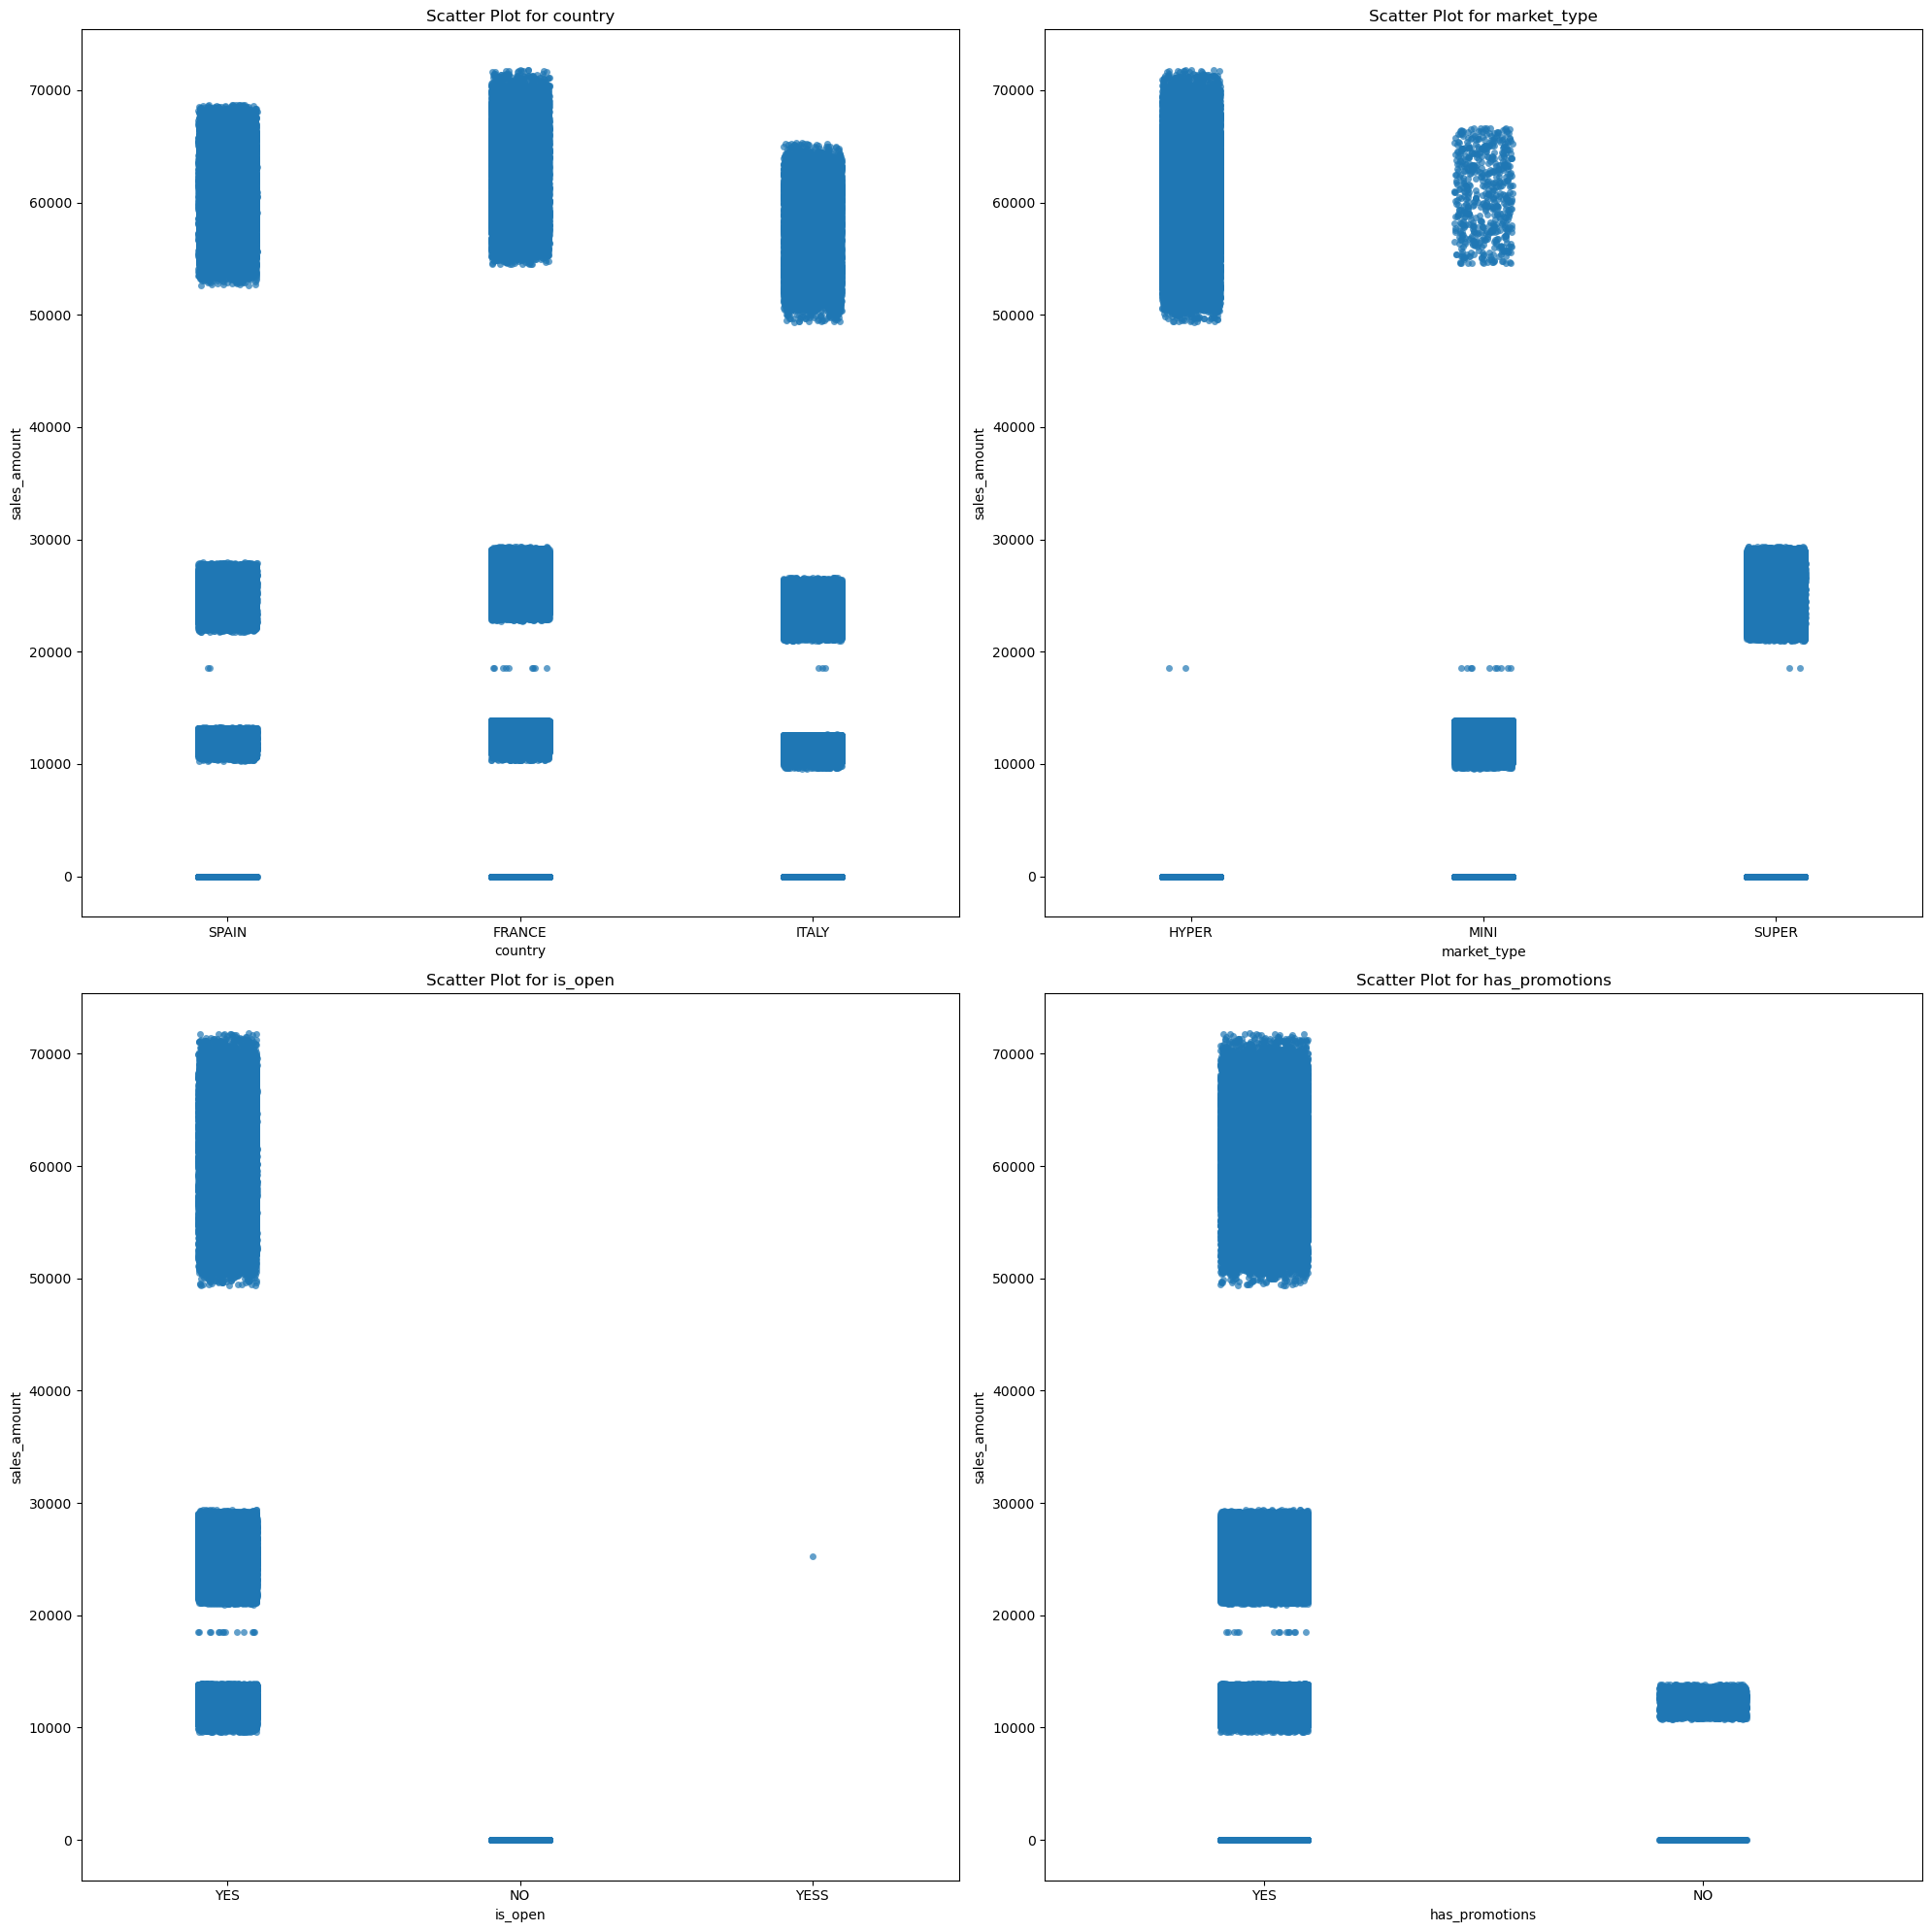

In [29]:
QualitativeColumns=["country","market_type","is_open","has_promotions"]
QualitativeColumns_dt=true_merged_df[QualitativeColumns]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(QualitativeColumns):
    sns.stripplot(x=col, y='sales_amount', data=true_merged_df, jitter=True, alpha=0.7, ax=ax[i])
    ax[i].set_title(f"Scatter Plot for {col}")
plt.tight_layout()

We can see there is another mistake in the "is_open" predictor.

Changing category "YESS" into "YES" is our next step.

In [30]:
condicion3 = true_merged_df['is_open']=="YESS"
true_merged_df.loc[condicion3, 'is_open']="YES"

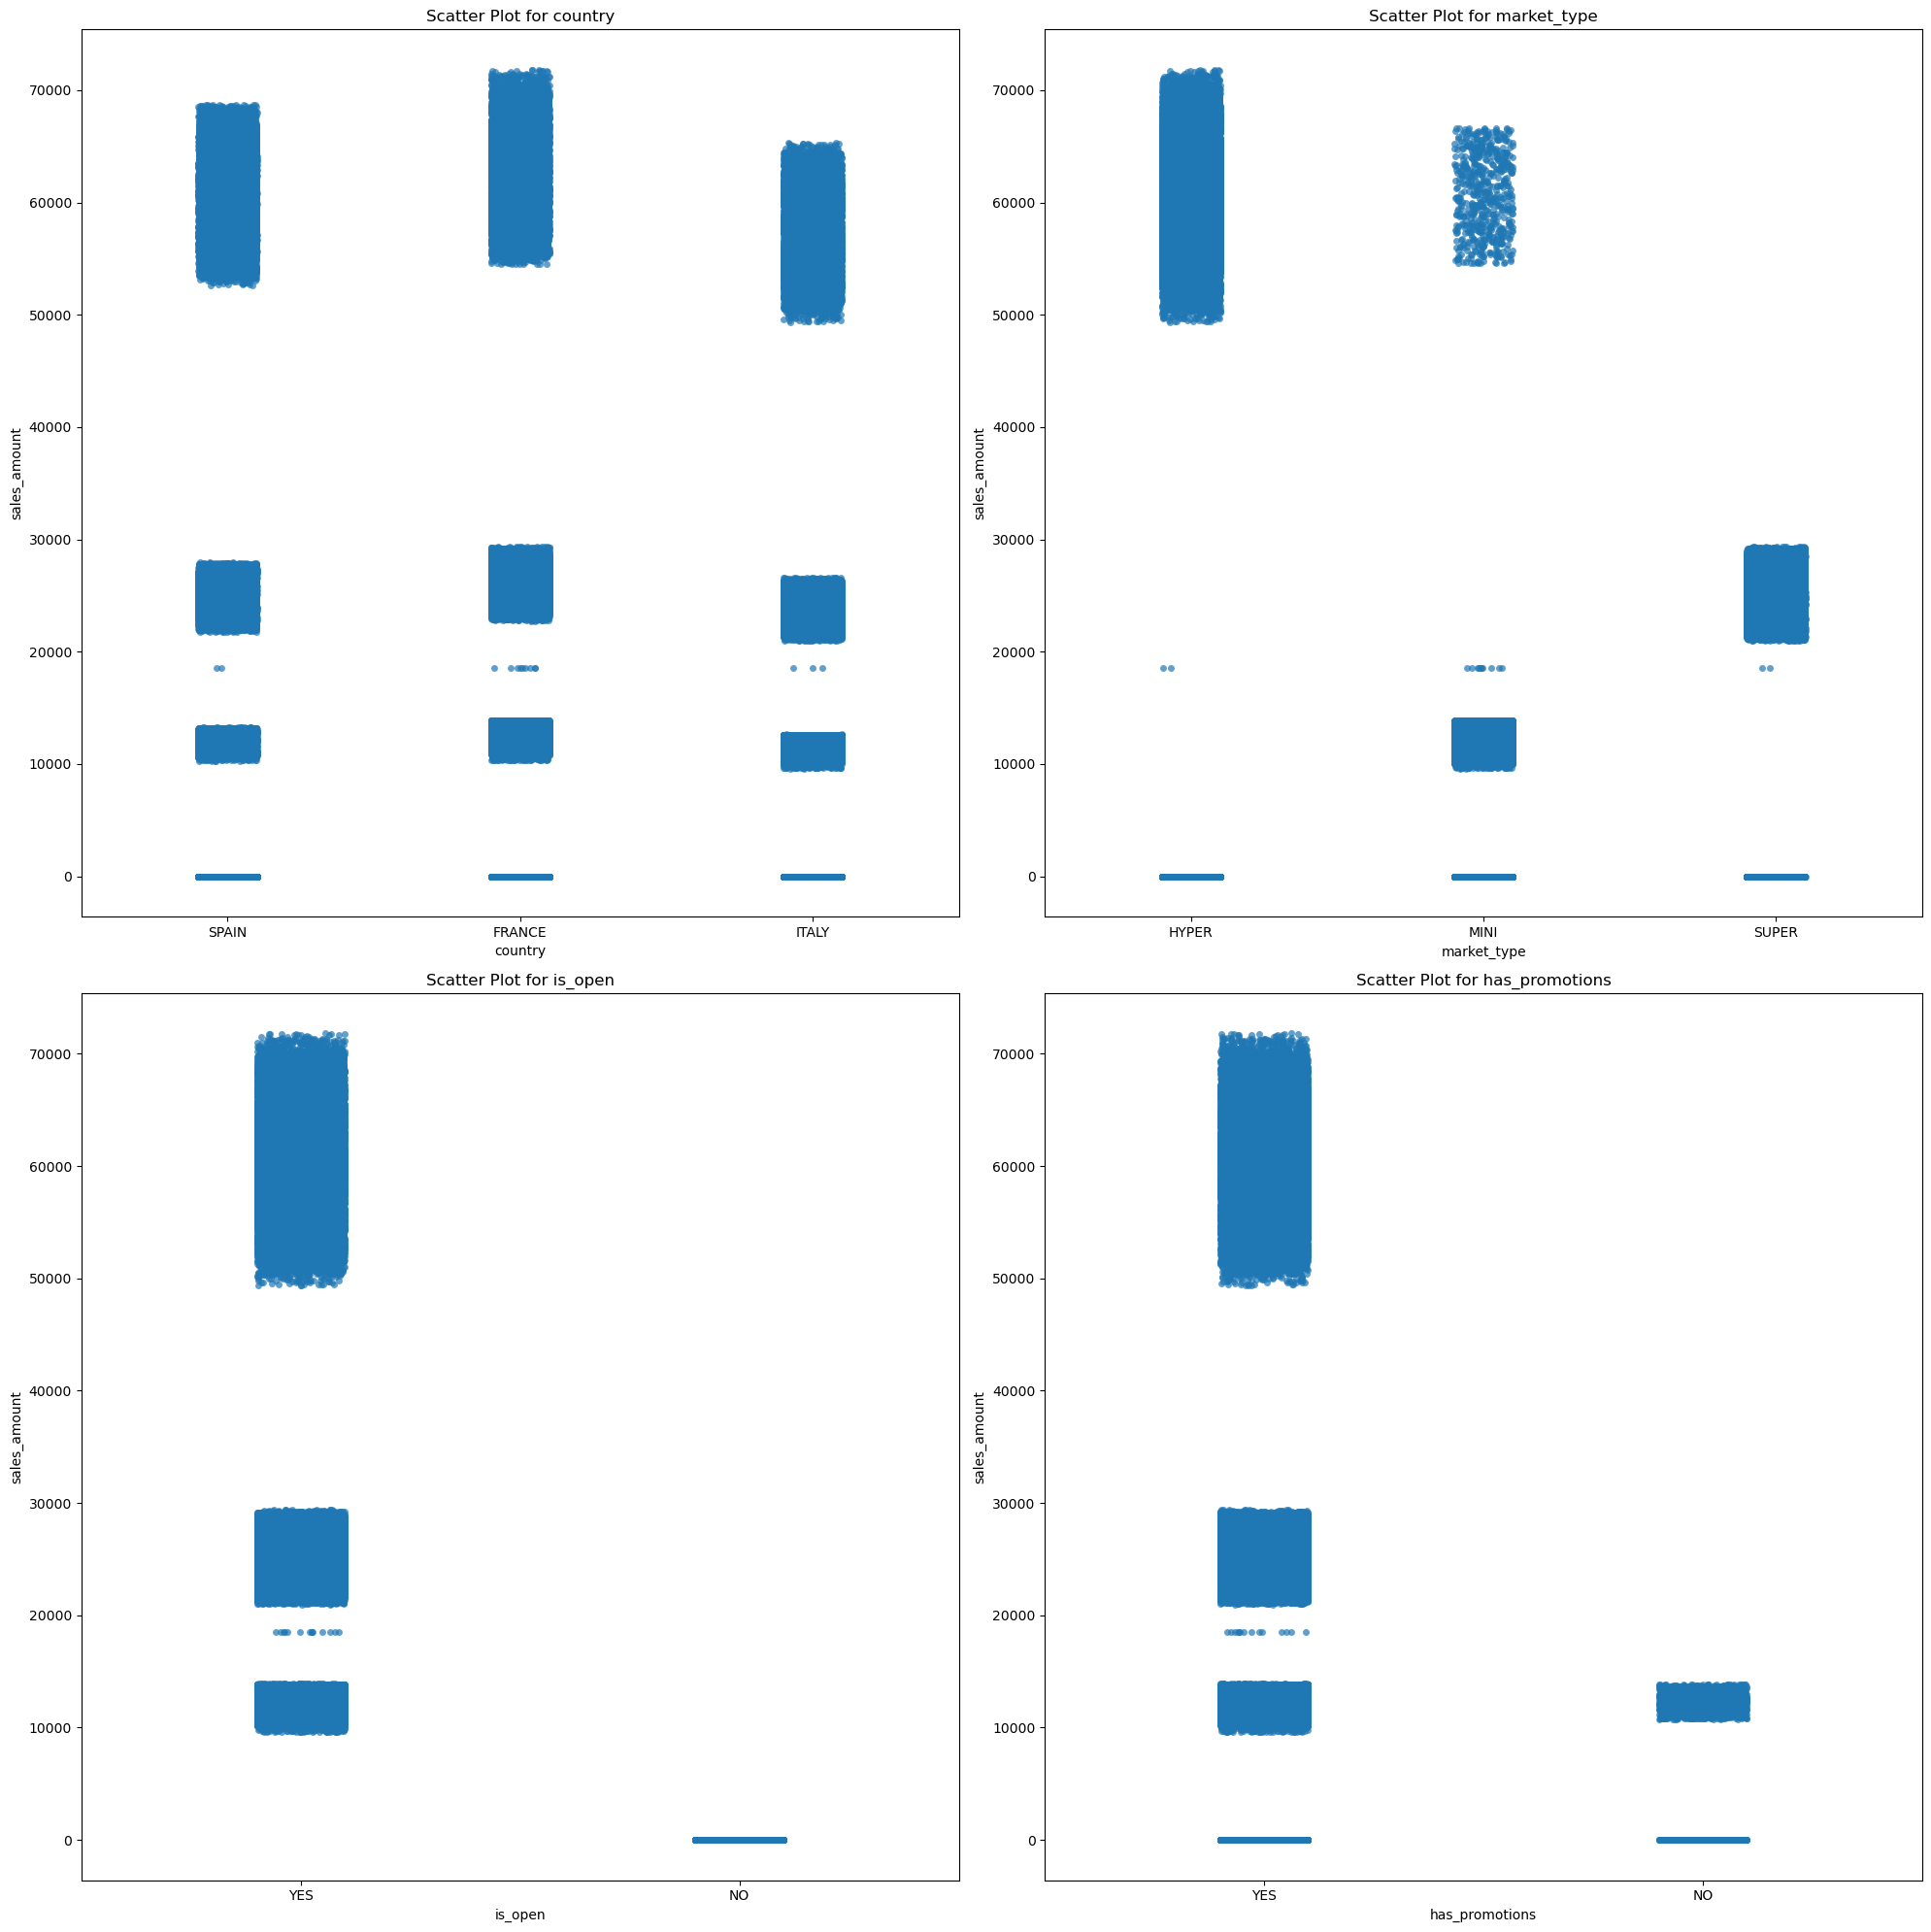

In [31]:
QualitativeColumns=["country","market_type","is_open","has_promotions"]
QualitativeColumns_dt=true_merged_df[QualitativeColumns]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(QualitativeColumns):
    sns.stripplot(x=col, y='sales_amount', data=true_merged_df, jitter=True, alpha=0.7, ax=ax[i])
    ax[i].set_title(f"Scatter Plot for {col}")
plt.tight_layout()

Clearly, the predictors "is_open" and "market_type" are strongly correlated with the our response variable "sales_amount". 

Now we are going to encode qualitative predictors. The command "drop_first=True" is useful in terms of avoiding multicollinearity.


In [32]:
true_merged_df = pd.get_dummies(true_merged_df, columns=['country'], prefix='categoria', drop_first=True)
true_merged_df = pd.get_dummies(true_merged_df, columns=['market_type'], prefix='categoria', drop_first=True)
true_merged_df = pd.get_dummies(true_merged_df, columns=['is_open'], prefix='categoria', drop_first=True)
true_merged_df = pd.get_dummies(true_merged_df, columns=['has_promotions'], prefix='categoria 2', drop_first=True)

Predictor "date" is going to be broken down in "year", "month" and "day"

In [33]:
true_merged_df['year'] = true_merged_df['date'].dt.year
true_merged_df['month'] = true_merged_df['date'].dt.month
true_merged_df['day'] = true_merged_df['date'].dt.day

true_merged_df = pd.get_dummies(true_merged_df, columns=['month'],drop_first=True)

In [34]:
true_merged_df

,market_id,date,sales_amount,square_feet,avg_customers,competitor_distance,categoria_ITALY,categoria_SPAIN,categoria_MINI,categoria_SUPER,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,XC14,2022-12-31,55727.34,11135.0,773.0,515.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,WG25,2022-12-31,12984.10,1402.0,252.0,522.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,UX72,2022-12-31,13046.56,1452.0,265.0,15939.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,EE84,2022-12-31,60916.76,15259.0,874.0,754.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,RF54,2022-12-31,12376.42,2497.0,191.0,34007.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523944,ZM74,2021-01-01,21553.84,5778.0,356.0,4424.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
523945,WW60,2021-01-01,56371.18,10923.0,907.0,41359.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
523946,LU14,2021-01-01,24107.19,5742.0,397.0,2841.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
523947,HY57,2021-01-01,12257.38,2495.0,228.0,3848.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Before computing our linear model we are going to transform out boorelian predictors into numerical ones.

After this step we are ready to compute it.

In [35]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

bool = true_merged_df.select_dtypes(include='bool').columns
true_merged_df[bool] = true_merged_df[bool].astype(int)

X = true_merged_df.loc[:, ~true_merged_df.columns.isin(["date","market_id","sales_amount"])]
y = true_merged_df["sales_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_with_intercept).fit()


In [36]:
coefficients = model.params
rows = []
for index, value in coefficients.items():
    row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
    rows.append(row)

summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
summary_coeff

,,OLS estimation,SE,t-stats,p-value
0,const,1864.713658,38608.610271,0.048298,9.614789e-01
1,square_feet,0.797321,0.009043,88.173831,0.000000e+00
2,avg_customers,6.878731,0.137374,50.073052,0.000000e+00
3,competitor_distance,-0.022004,0.001159,-18.977863,2.809762e-80
4,categoria_ITALY,-1755.987703,22.959165,-76.483081,0.000000e+00
5,categoria_SPAIN,-664.275334,24.251793,-27.390772,4.944380e-165
6,categoria_MINI,-28427.039461,115.186884,-246.790593,0.000000e+00
7,categoria_SUPER,-22066.653973,74.998946,-294.226188,0.000000e+00
8,categoria_YES,22604.860208,25.527476,885.510964,0.000000e+00
9,categoria 2_YES,385.836607,128.541674,3.001646,2.685400e-03


- So when **every single predictor** is 0 the espected value of the response is **1.864,713658.**

- If 1 unit increase in the predictor **"square_feet"** the estimated **increase** in the response is **0,797321.**

- If 1 unit increase in the predictor **"avg_customers"** the estimated **increase** in the response is **6,878731.**

- If 1 unit increase in the predictor **"competitor_distance"** the estimated **decrease** in the response is **-0,022004.**

- If the market **is settled down in Spain**, the estimated **decrease** in the response is **-664,275334.**

- If the market **is settled down in Italy**, the estimated **decrease** in the response is **-1.755,987703.**

- If the market **is catalogued as a Mini-market**, the estimated **decrease** in the response is **-28.427,039461.**

- If the market **is catlogued as a Super-market**, the estimated **decrease** in the respone is **-22.066,653973.**

- If the market **is opened**, the estimated **increase** in the response is **22.604,860208.**

- If the market **has discounts**, the estimated **increase** in the response is **385,836607.**

Regarding the p-values, we can strongly reject the null hypotesis of all the perdictors that aren´t related with the date. 

For "date" ones we can´t reject the null hypotesis because they are bigger than significance level.

We can also comput the confidence intervals 

In [37]:
confidence_intervals = model.conf_int(alpha=0.05)  

for index, value in coefficients.items():
    conf_int_tmp = confidence_intervals.loc[index].values
    print(f"The 95% confidence interval for {index} is {conf_int_tmp}")

The 95% confidence interval for const is [-73806.99049294  77536.41780828]
The 95% confidence interval for square_feet is [0.7795975  0.81504395]
The 95% confidence interval for avg_customers is [6.60948248 7.14797989]
The 95% confidence interval for competitor_distance is [-0.02427639 -0.01973141]
The 95% confidence interval for categoria_ITALY is [-1800.98697049 -1710.98843596]
The 95% confidence interval for categoria_SPAIN is [-711.80811195 -616.74255626]
The 95% confidence interval for categoria_MINI is [-28652.80225745 -28201.27666487]
The 95% confidence interval for categoria_SUPER is [-22213.64963058 -21919.65831521]
The 95% confidence interval for categoria_YES is [22554.82712956 22654.89328709]
The 95% confidence interval for categoria 2_YES is [133.89882844 637.77438611]
The 95% confidence interval for year is [-29.97559962  44.88696638]
The 95% confidence interval for day is [-1.59107591  2.66357104]
The 95% confidence interval for month_2 is [-76.54713922 105.6949285 ]
The

To interpret the accuracy of our model´s fit we can compute some metrics.

- RSE (Residual standard error)

- R^2 statistic

- MSE (Mean squared error)

In [38]:
y_pred = model.predict(X_test_with_intercept)

residuals = y_pred - y_test
RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5

R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

MSE = ((y_test - y_pred) ** 2).mean()

print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

The RSE is 6212.37, the R2 is 0.86 and the MSE is 38585071.7


RSE is suggesting us that when we are predicting the daily sales amount of a market our prediction is 6.212´37 euros far away from the reality. 

R^2 is high, with a 0.86 value. It indicates our predictors explain a huge part of the variability in the data. 

Finally, we can assumme the fit of our linear model is quite good to our data.

To conclude, we are going to check the potencial problems of using a linear regreseion model.

- Correlation of error terms

Representating in visual mode can be very useful to identify this problem. No discernible pattern should be recognised.

Text(0, 0.5, 'Training residuals')

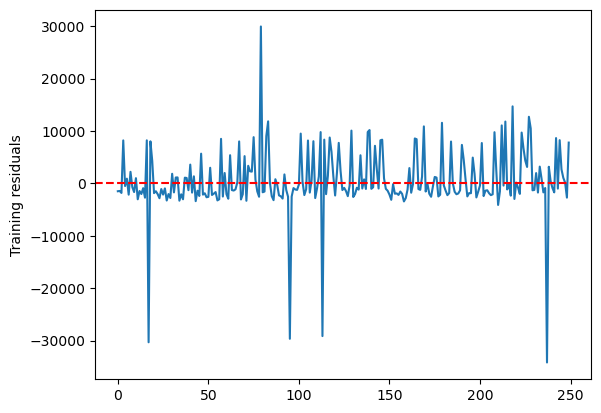

In [39]:
residuals_training = model.resid 

sample_size = 250  
random_indices = np.random.choice(residuals_training.index, size=sample_size, replace=False)
sample_residuals = residuals_training.loc[random_indices]

plt.plot(range(sample_size), sample_residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Training residuals")


To my understanding, there is no correlation. In any case, lets compute the autocorrelation with lagged-1 residuals and also Durbin-Watson.

In [40]:
lagged_residuals = residuals_training.shift(1)  
autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

durbin_watson = sm.stats.durbin_watson(residuals_training)

print(f"The autocorrelation is {round(autocorrelation, 5)} while the durbing watson statistic is {round(durbin_watson, 5)}, suggesting that error terms are not correlated")

The autocorrelation is 0.0 while the durbing watson statistic is 2.00253, suggesting that error terms are not correlated


Perfect. Next potential problem:

- Non-constant Variance of Error Terms

We are going to use The Breusch-Pagan Lagrange Multiplier test








In [41]:
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(residuals_training, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 158039.0238941216), ('p-value', 0.0)]

We can strongly reject the null hypotesis so we have this problem. It is clearly heteroscedasticity. 

We are going to try to solve it doing a log transformation in our response variable to stabilize variance.

In [42]:
logY = np.log1p(y_train)

logModel = sm.OLS(logY, X_train_with_intercept)
logResults = logModel.fit()

coefficients = logResults.params
rows = []
for index, value in coefficients.items():
    row = [index, value, logResults.bse[index], logResults.tvalues[index], logResults.pvalues[index]]
    rows.append(row)

In [43]:
logPredictions = logResults.predict(X_test_with_intercept)
y_pred=np.expm1(logPredictions)

logResiduals = y_pred - y_test
RSE = (sum(logResiduals ** 2) / (len(logResiduals) - X.shape[1] - 1)) ** 0.5

R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

MSE = ((y_test - y_pred) ** 2).mean()

print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

The RSE is 4219.1, the R2 is 0.93 and the MSE is 17796936.25


Have we solved the main problem?.

Let´s check it.

In [44]:
residuals_training = logResults.resid 

residuals=np.expm1(residuals_training)

name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(residuals, logResults.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 112950.37049476837), ('p-value', 0.0)]

This hasn´t solve anything. Let´s try another type of transformation.

Square root transformation might be a good guess.

In [45]:
sqrtY = np.sqrt(y_train)

sqrtModel = sm.OLS(sqrtY, X_train_with_intercept)
sqrtResults = sqrtModel.fit()

coefficients = sqrtResults.params
rows = []
for index, value in coefficients.items():
    row = [index, value, logResults.bse[index], logResults.tvalues[index], logResults.pvalues[index]]
    rows.append(row)

In [46]:
sqrtPredictions = sqrtResults.predict(X_test_with_intercept)
y_pred=np.square(sqrtPredictions)

residuals = y_pred - y_test
RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5

R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

MSE = ((y_test - y_pred) ** 2).mean()

print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

The RSE is 3695.33, the R2 is 0.95 and the MSE is 13652489.75


In [47]:
residuals_training = sqrtResults.resid 

residuals=np.square(residuals_training)

name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(residuals, sqrtResults.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 110268.60684774259), ('p-value', 0.0)]

We have still done nothing to deal with it but really I don´t know what to try to come up with the solution. The last potencial problem:

- Collinearity

VIF (Variance inflation factor) is quite useful to identify collinearity.

The closer to 1 VIF is, the smallest is collinearity, but if it exceeds 5 or 10 it indicates a problematic amount of collinearity.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
vif

,VIF Factor,Feature
0,29.968490,square_feet
1,30.415676,avg_customers
2,1.469468,competitor_distance
3,1.557234,categoria_ITALY
4,1.511067,categoria_SPAIN
5,80.262508,categoria_MINI
6,20.308598,categoria_SUPER
7,5.965409,categoria_YES
8,181.008238,categoria 2_YES
9,436.781994,year


The are some values that are quite high, so we may merged or remove some predictors. 

With all this analysis, in my opinion feature selection and dimension reduction methods can be very useful to achieve a better fit in our model. 

We are going to do feature selection to see if we were right. 

The method I have chosen to perform feature selection is Forward stepwise selection v1. 

The amount of observations is huge so it can fit as well as v2 in spite of not using k-fold CV.

In [49]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score

def forward_stepwise_selection(X, y):
    selected_features = []
    
    while True:
        remaining_features = list(set(X.columns) - set(selected_features))
        if not remaining_features:
            break
        
        f_stats, _ = f_regression(X[remaining_features], y)
        
        best_feature_idx = f_stats.argmax()
        best_feature = remaining_features[best_feature_idx]
        
        selected_features.append(best_feature)
        
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        
        r2 = r2_score(y, model.predict(sm.add_constant(X[selected_features])))
        mse = mean_squared_error(y, model.predict(sm.add_constant(X[selected_features])))


        bic = model.bic

        n = len(y)
        k = len(selected_features) + 1  
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
        
        cp = mse * (n - k) + 2 * k * mse / (n - k)

        
        print(f"Features selected: {selected_features}, Adjuted R^2: {adj_r2}, BIC: {bic}, Cp: {cp}")
    
    return selected_features


selected_features = forward_stepwise_selection(X_train, y_train)

final_model = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()


Features selected: ['square_feet'], Adjuted R^2: 0.5416505566907991, BIC: 9001820.77916861, Cp: 52106640672301.25
Features selected: ['square_feet', 'avg_customers'], Adjuted R^2: 0.559157700206999, BIC: 8985508.995032549, Cp: 50116133088857.375
Features selected: ['square_feet', 'avg_customers', 'categoria_MINI'], Adjuted R^2: 0.5646614650309711, BIC: 8980255.031772433, Cp: 49490214219447.94
Features selected: ['square_feet', 'avg_customers', 'categoria_MINI', 'categoria_YES'], Adjuted R^2: 0.8287991323291785, BIC: 8589078.100746918, Cp: 19462387329802.863
Features selected: ['square_feet', 'avg_customers', 'categoria_MINI', 'categoria_YES', 'categoria_SUPER'], Adjuted R^2: 0.8577036171118807, BIC: 8511578.176174462, Cp: 16176402272490.95
Features selected: ['square_feet', 'avg_customers', 'categoria_MINI', 'categoria_YES', 'categoria_SUPER', 'categoria_SPAIN'], Adjuted R^2: 0.857703872745383, BIC: 8511589.369143967, Cp: 16176296024693.928
Features selected: ['square_feet', 'avg_custo

So the best feature selection interpretating diferent indirect test error estimate, like Adjusted R^2, BIC and Cp is ['square_feet', 'avg_customers', 'categoria_MINI', 'categoria_YES', 'categoria_SUPER', 'categoria_SPAIN', 'categoria 2_YES', 'competitor_distance', 'day', 'categoria_ITALY'] 

Let´s compute the model with only these predictors.

In [50]:
FeatureSelection=["square_feet","avg_customers","categoria_MINI","categoria_YES","categoria_SUPER","categoria_SPAIN","categoria 2_YES","competitor_distance","day","categoria_ITALY","sales_amount"]
FeatureSelection_df=true_merged_df[FeatureSelection]

X = FeatureSelection_df.loc[:, FeatureSelection_df.columns != "sales_amount"]
y = true_merged_df["sales_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_with_intercept).fit()


In [51]:
coefficients = model.params
rows = []
for index, value in coefficients.items():
    row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
    rows.append(row)

summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
summary_coeff

,,OLS estimation,SE,t-stats,p-value
0,const,16980.782829,196.635881,86.356481,0.000000e+00
1,square_feet,0.797225,0.009042,88.168582,0.000000e+00
2,avg_customers,6.878516,0.137372,50.072200,0.000000e+00
3,categoria_MINI,-28428.231824,115.178353,-246.819225,0.000000e+00
4,categoria_YES,22602.914430,25.449132,888.160529,0.000000e+00
5,categoria_SUPER,-22067.902958,74.987773,-294.286682,0.000000e+00
6,categoria_SPAIN,-664.450050,24.251028,-27.398840,3.964269e-165
7,categoria 2_YES,385.358598,128.538967,2.997990,2.717821e-03
8,competitor_distance,-0.021995,0.001159,-18.971058,3.197798e-80
9,day,0.539182,1.084132,0.497340,6.189495e-01


In [52]:
y_pred = model.predict(X_test_with_intercept)

residuals = y_pred - y_test
RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5

R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

MSE = ((y_test - y_pred) ** 2).mean()

print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

The RSE is 6211.98, the R2 is 0.86 and the MSE is 38584687.63


We have improved the fit of our model saving computational power with less predictors. 

Let´s check if we can even upgrade the accuracy of our model applying Ridge regresion.

With this one coefficients can´t be 0 while with Lasso they could. We have done before a feature selection so we can compare the results without applying Lasso.

First step is standardize features to avoid giving more importance to variables with higher magnitude.

In [53]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
import numpy as np

ridge = Ridge()

selector = RFECV(estimator=ridge, step=1, cv=5) 

selector = selector.fit(X_scaled, y)

X_selected = selector.transform(X_scaled)

ridge_final = Ridge()
ridge_final.fit(X_selected, y)

selected_features = X.columns[selector.support_]

ridge_scores = cross_val_score(ridge_final, X_selected, y, cv=5, scoring='r2')
y_pred = ridge_final.predict(X_selected)
mse = mean_squared_error(y, y_pred)
rse = np.sqrt(mse)

print(f"The RSE is {rse}, the R2 is {np.mean(ridge_scores)} and the MSE is {mse}")


The RSE is 6176.7469779244175, the R2 is 0.8594477157471774 and the MSE is 38152203.22929842


The accuracy is a bit better applying Ridge regresion. From my point of viuw this is the best linear model to estimate "sales_amount".

Let´s check the coefficient to answer the main question of these exercise.: How does a 1-unit increase in the predictors lead to a XX variation in the response.

In [55]:
coef_original_scale = ridge_final.coef_ / scaler.scale_
intercept_original_scale = ridge_final.intercept_ - np.sum(coef_original_scale * scaler.mean_)

print("Coeficientes:")
coef_df= pd.DataFrame(data={'Variable': X.columns[selector.support_], 'Coeficiente': coef_original_scale})
print(coef_df) 
print("\nIntercepto:", intercept_original_scale)


Coeficientes:
              Variable   Coeficiente
0          square_feet      0.787708
1        avg_customers      6.754561
2       categoria_MINI -28586.800186
3        categoria_YES  22608.073070
4      categoria_SUPER -22166.554347
5      categoria_SPAIN   -658.495893
6      categoria 2_YES    364.287972
7  competitor_distance     -0.021671
8                  day      0.706073
9      categoria_ITALY  -1742.170801

Intercepto: 17191.591195306384


- So when **every single predictor** is 0 the espected value of the response is **17.191´591195306384.**

- If 1 unit increase in the predictor **"square_feet"** the estimated **increase** in the response is **0´787708.**

- If 1 unit increase in the predictor **"avg_customers"** the estimated **increase** in the response is **6´754561.**

- If 1 unit increase in the predictor **"competitor_distance"** the estimated **decrease** in the response is **-0´021671.**

- If the market **is settled down in Spain**, the estimated **decrease** in the response is **-658´495893.**

- If the market **is settled down in Italy**, the estimated **decrease** in the response is **-1.742´170801.**

- If the market **is catalogued as a Mini-market**, the estimated **decrease** in the response is **-28.586´800186.**

- If the market **is catlogued as a Super-market**, the estimated **decrease** in the respone is **-22.166´554347.**

- If the market **is opened**, the estimated **increase** in the response is **22.608´073070.**

- If the market **has discounts**, the estimated **increase** in the response is **364´287972.**

- Depending on the day of the month we are, the estimated **increase** in the response is **0.706073.**

Now, we are going to compute all the models we have studied along the course.

Starting with polynomial regresion, in particular, splines.

We are aiming to smoothing splines. Let´s apply Generalized Additive Model (GAM) since we have more than one predictor.


In [56]:
X = FeatureSelection_df.loc[:, FeatureSelection_df.columns != "sales_amount"]
y = true_merged_df["sales_amount"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=99)

To control smooth we are going to serch the best lambda value for the penalty term.

So we are going to enclose lambda in smaller intervals.

In [58]:
from pygam import LinearGAM, s
from functools import reduce
import numpy as np

best_lmbd_gam = {"MSE": float("inf"), "lmbd": float("inf")}

for lmbd in np.logspace(-5, 5, 11):

    mse_folds = []

    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        s_terms = [s(i, lam=lmbd) for i in range(len(X_train.columns))]
        gam = LinearGAM(reduce(lambda x, y: x + y, s_terms))
        gam.fit(X_train, y_train)

        y_pred = gam.predict(X_validation)
        current_mse = ((y_validation - y_pred)**2).mean()
        mse_folds.append(current_mse)
    
    estimated_test_error = sum(mse_folds) / len(mse_folds)

    if estimated_test_error < best_lmbd_gam["MSE"]:
        best_lmbd_gam["MSE"] = estimated_test_error
        best_lmbd_gam["lmbd"] = lmbd

print(f"The lowest estimated test error MSE is {round(best_lmbd_gam['MSE'], 2)}, obtained when lambda = {round(best_lmbd_gam['lmbd'], 2)}")


The lowest estimated test error MSE is 36720409.92, obtained when lambda = 0.0


We have searched lambda values into the next interval [10^-5,10^5] and the best value is 0. (I have also explored the interval (0,10) and also the best lambda was 0.0)

The conclusion is: GAM is reduced into a linear model so a the last one has quite good fit to estimate the response variable.



We can also plot the individual smoothing splines to check for positive/negative relationship with respect to the target.

<Figure size 640x480 with 0 Axes>

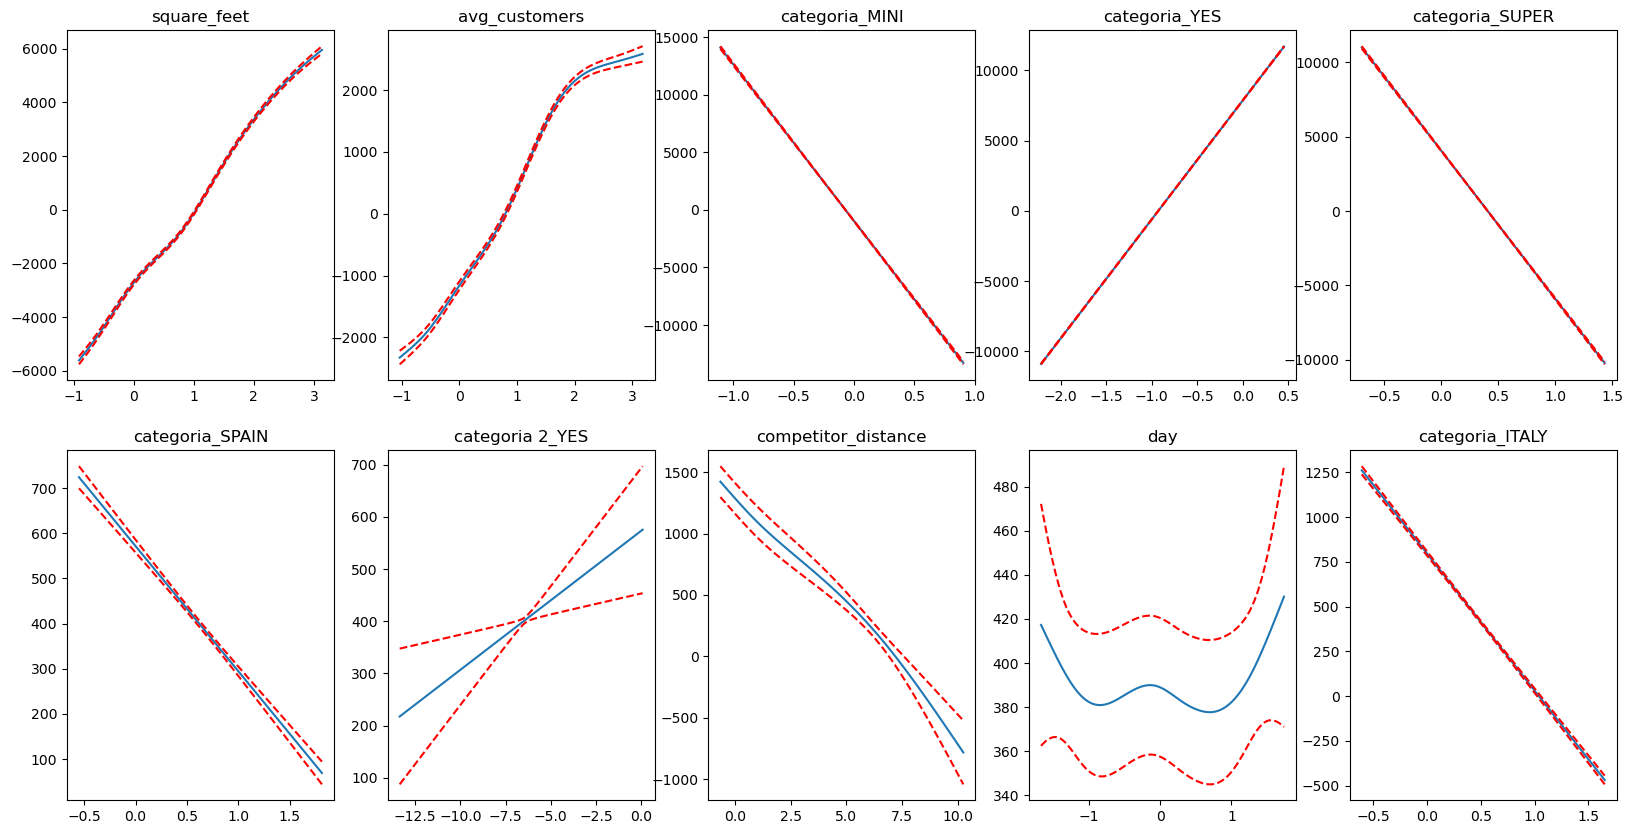

In [59]:
import matplotlib.pyplot as plt

plt.figure()
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(X.columns[i]) 

plt.show()


It seems like GAM hasn´t be so efective because most of the predictors can be aproximated properly by linear regresion.

Let´s compute the next type of model, decision tree.

We are going to use two ensemble methods:

- Random forests

- Boosting



Begining with random forest. 

We are not going to use bagging because in spite of the feature selection done before, there are predictors stronger than others, so many of the decision trees will have the same predictor at the root node.

In [60]:
from sklearn.ensemble import RandomForestRegressor

mse_folds = []

for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    model = RandomForestRegressor(n_estimators=200, max_features="sqrt", random_state=99)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 2198769.12


As far as I know, this model´s accuracy is another level compared with the linear and polynomial model computed before.

We are going to continue with gradient boosting.

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

mse_folds = []

for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=99)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 2061036.0


Trying diferent values of "n_estimators" the increase of computational cost related with the fit of the model suggests us it is enought with those values. 

We have achieved another upgrade in terms of fit.

To finish with, we are going to compute one of the most powerful model in machine learning, SMV (Support Vector Machine)

Starting using radial kernel (most common used)

(NOTE: It has been very demandating and my computer couldn´t have run it, i have tryed also 'lineal' kernel)



A posible solution might be checking random combination of the parameters intead of checking them all.

In [62]:
#from sklearn.svm import SVR
#from sklearn.model_selection import RandomizedSearchCV
#import numpy as np

#parameters = {
    #'C': np.linspace(1, 10, 5).tolist(),  
    #'kernel': ['linear'],  
    #'gamma': ['scale', 'auto'] + np.linspace(0.01, 1, 5).tolist(),  
#}

#svm = SVR()

#random_search = RandomizedSearchCV(svm, parameters, cv=5, n_iter=10)

#random_search.fit(X_scaled, y)

#best_params = random_search.best_params_

#print(best_params)


In [63]:

#mse_folds = []

#for train_idx, validation_idx in kf.split(X_scaled):
    #X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    #y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    #model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"]) 
    #model.fit(X_train, y_train)

    #y_pred = model.predict(X_validation)
    #current_mse = ((y_validation - y_pred)**2).mean()
    #mse_folds.append(current_mse)

#estimated_test_error = sum(mse_folds) / len(mse_folds)
#print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

It hasn´t worked either. 

Let´s give another try but now with a sample of our datatest to reduce the computational cost.

In [64]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV



X_sample, X_rest, y_sample, y_rest = train_test_split(X_scaled, y, test_size=0.99, random_state=42)

parameters = {
    'C': np.linspace(1, 10, 5).tolist(),
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'] + np.linspace(0.01, 1, 5).tolist(),
}

svm = SVR()

random_search = RandomizedSearchCV(svm, parameters, cv=5, n_iter=10)
random_search.fit(X_sample, y_sample)

best_params = random_search.best_params_

print(best_params)


{'kernel': 'linear', 'gamma': 'auto', 'C': 10.0}


In [65]:

mse_folds = []

for train_idx, validation_idx in kf.split(X_sample):
    X_train, X_validation = X_sample.iloc[train_idx], X_sample.iloc[validation_idx]
    y_train, y_validation = y_sample.iloc[train_idx], y_sample.iloc[validation_idx]

    model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"]) 
    model.fit(X_train, y_train)

    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 48784151.39


With a bigger sample i can´t run the model. It is clear we would need more data to compute the SMV with a competitive accuracy towards the other type of models.

With all the conclusions we have done till the final of the project, the best model to estimate which markets should we open to maximize the "sales_amount" is gradient boosting.

Let´s se what the estimation is suggesting us.

In [66]:
data = {
    'square_feet': [1850, 2100, 1920, 5880, 5120, 4970, 10560, 12570, 11980],
    'avg_customers': [190, 215, 220, 420, 390, 410, 860, 880, 790],
    'categoria_MINI': [1, 1, 1, 0, 0, 0, 0, 0, 0],
    'categoria_YES': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'categoria_SUPER': [0, 0, 0, 1, 1, 1, 0, 0, 0],
    'categoria_SPAIN': [1, 0, 0, 1, 0, 0, 1, 0, 0],
    'categoria 2_YES': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'competitor_distance': [4500, 1850, 1450, 580, 2560, 3520, 8940, 7580, 11560],
    'day': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'categoria_ITALY': [0, 0, 1, 0, 0, 1, 0, 0, 1],
}

unseenData_df = pd.DataFrame(data)

In [67]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=99)
model.fit(X, y)
y_pred = model.predict(unseenData_df)

In [68]:
y_pred

array([11881.29956783, 12572.10415709, 11385.20306783, 25180.79025332,
       25814.18900058, 23718.40328774, 60115.89574366, 63246.59427709,
       57376.92458746])

So the best options to maximize the "sales_amount" is to open:

- Mini market: **France**

- Super market: **France**

- Hyper market: **France** 

Why? The estimated test MSE error of our model is 2061036.0, so RSE is 1435.630872. The decision we are considerating knowing this is very solid even in the Super market category, that is the one with the closest estimation of sales_amount.








